In [5]:
# import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [4]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=5e86e5a2371b75c1035821e8a1451f3e8a3c6d36dc979ac72194febe3377ae41
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [45]:
# upload data
# ini contoh data yang pengen kita analsis menggunakan survival probaility
df = pd.read_csv("22112023_ansur.csv", delimiter=";")
df.head()

,Umur,Kelamin,Stadium,Treatment,Survival_time,Status
0,23,Female,Parah,Standar,34,False
1,24,Female,Parah,Standar,4,True
2,61,Male,Parah,Standar,10,True
3,18,Female,Parah,Standar,5,True
4,29,Male,Parah,Standar,20,True


In [ ]:
df.info() # cek struktur data

In [ ]:
df.describe() # statistika deskriptif data

In [2]:
# dataset kanker paru-paru

!wget https://raw.githubusercontent.com/towardsai/tutorials/master/survival_analysis_in_python/lung.csv

--2023-11-23 04:46:55--  https://raw.githubusercontent.com/towardsai/tutorials/master/survival_analysis_in_python/lung.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7856 (7.7K) [text/plain]
Saving to: ‘lung.csv’

lung.csv            100%[===================>]   7.67K  --.-KB/s    in 0s      

2023-11-23 04:46:55 (47.8 MB/s) - ‘lung.csv’ saved [7856/7856]



Kurva Kaplan-Meier adalah suatu metode yang digunakan dalam analisis survival untuk memodelkan probabilitas bertahan hidup (survival) dari suatu kelompok pasien atau subjek penelitian seiring waktu. Kurva ini membantu menggambarkan perkiraan fungsi survival berdasarkan data pengamatan dan dapat memberikan informasi yang berguna dalam pemahaman tingkat survival pada berbagai titik waktu.

Tujuan utama dari Kurva Kaplan-Meier adalah:

1. **Menggambarkan Probabilitas Survival:**
   - Menunjukkan probabilitas bertahan hidup pada berbagai titik waktu setelah suatu peristiwa atau pengamatan dimulai. Ini dapat berguna untuk melihat seberapa lama suatu kelompok pasien atau subjek cenderung bertahan hidup.

2. **Membandingkan Kelompok:**
   - Memungkinkan perbandingan survival antara dua atau lebih kelompok. Misalnya, apakah pasien yang menerima dua jenis pengobatan berbeda memiliki tingkat survival yang berbeda.

3. **Mengidentifikasi Faktor Risiko:**
   - Menunjukkan pengaruh faktor-faktor tertentu (seperti jenis pengobatan, jenis kelamin, usia, dll.) terhadap survival. Ini dapat membantu identifikasi faktor-faktor risiko yang dapat mempengaruhi hasil survival.

4. **Menunjukkan Interval Kepercayaan:**
   - Menyertakan interval kepercayaan di sekitar kurva survival, yang memberikan informasi tentang seberapa yakin kita dengan perkiraan survival pada setiap titik waktu.

5. **Melihat Bentuk Kurva:**
   - Mengamati bentuk kurva survival dapat memberikan wawasan tentang bagaimana tingkat survival berubah seiring waktu. Apakah ada penurunan signifikan pada awal pengamatan atau apakah risikonya merata sepanjang waktu.

6. **Pemilihan Waktu Tertentu:**
   - Memungkinkan pemilihan waktu tertentu untuk melihat probabilitas bertahan hidup pada titik waktu kritis yang mungkin relevan dalam konteks klinis atau penelitian.

Kurva Kaplan-Meier memberikan gambaran visual yang informatif dan berguna dalam analisis survival. Selain itu, hasilnya dapat digunakan untuk melengkapi analisis statistik lainnya, seperti uji log-rank atau model Cox PH, untuk mendapatkan pemahaman yang lebih komprehensif tentang survival data.


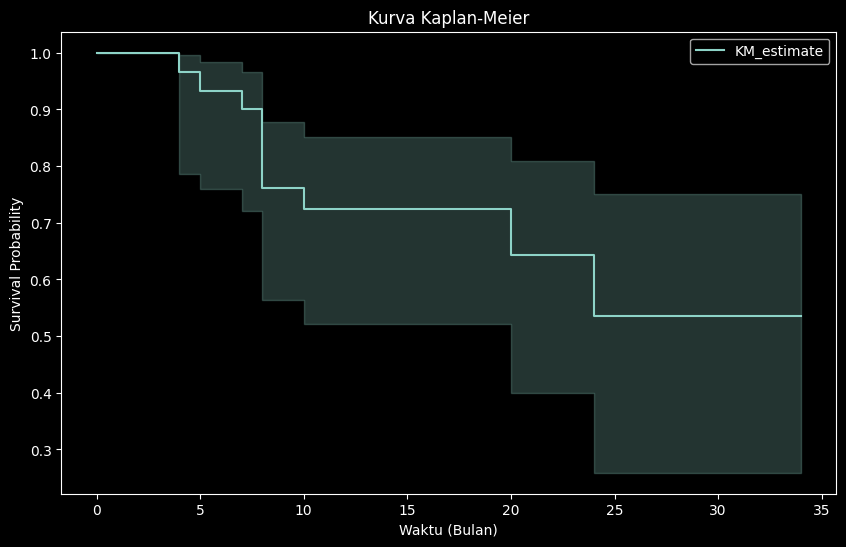

In [49]:
# Membuat kurva Kaplan-Meier
kmf1 = KaplanMeierFitter()
kmf1.fit(durations=df["Survival_time"], event_observed=df["Status"])

# Menampilkan kurva Kaplan-Meier
plt.figure(figsize=(10, 6))
kmf1.plot_survival_function()
plt.title("Kurva Kaplan-Meier")
plt.xlabel("Waktu (Bulan)")
plt.ylabel("Survival Probability")
plt.show()


Interpretasi Kurva KM ini:

Pada bulan ke-35 survival probabilitynya adalah 0.55, ini berarti bahwa berdasarkan data yang diamati, diperkirakan hanya 55% dari kelompok tersebut yang masih bertahan hidup pada saat itu. Pada titik waktu tersebut, sebagian besar kelompok mungkin telah mengalami kejadian yang menyebabkan "failure" atau "event" (sesuai dengan konteks data survival, seperti kematian atau peristiwa lainnya).

In [50]:
kmf1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,30,30
4.0,1,1,0,0,30
5.0,1,1,0,0,29
7.0,2,1,1,0,28
8.0,6,4,2,0,26
10.0,1,1,0,0,20
11.0,2,0,2,0,19
12.0,1,0,1,0,17
13.0,1,0,1,0,16


In [51]:
#Predicting the surviaval probability for an array of value:

kmf1.predict([0,5,11,12])

0     1.000000
5     0.933333
11    0.723462
12    0.723462
Name: KM_estimate, dtype: float64

In [52]:
#To get the full list:

kmf1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.966667
5.0,0.933333
7.0,0.900000
8.0,0.761538
10.0,0.723462
11.0,0.723462
12.0,0.723462
13.0,0.723462


Text(0, 0.5, 'Probability of survival')

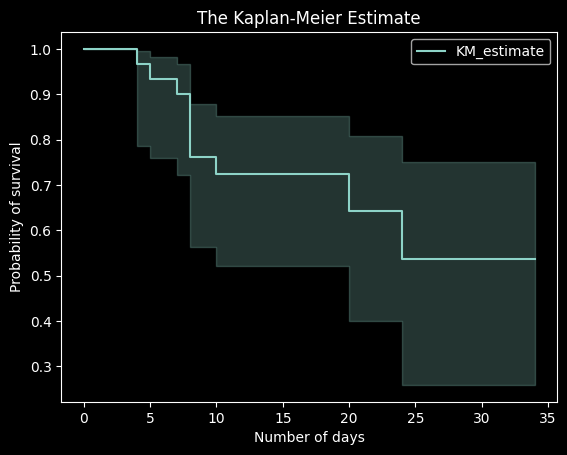

In [53]:
#Plot the graph:

kmf1.plot()
plt.title("The Kaplan-Meier Estimate")
plt.xlabel("Number of days")
plt.ylabel("Probability of survival")

In [54]:
#The median number of days:

print("The median survival time: ",kmf1.median_survival_time_)

The median survival time:  inf


In [55]:
#Survival probability with confidence interval:

kmf1.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
4.0,0.786084,0.995236
5.0,0.758859,0.982898
7.0,0.721193,0.966607
8.0,0.563651,0.878589
10.0,0.521409,0.851370
11.0,0.521409,0.851370
12.0,0.521409,0.851370
13.0,0.521409,0.851370
15.0,0.521409,0.851370


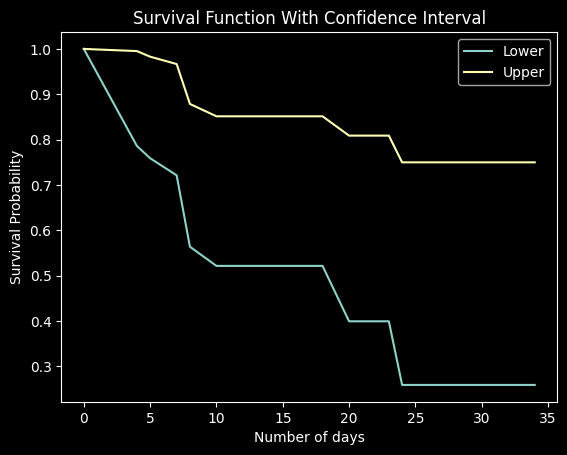

In [56]:
#Plot survival function with confidence interval:

confidence_surv_func = kmf1.confidence_interval_survival_function_

plt.plot(confidence_surv_func["KM_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["KM_estimate_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [57]:
#Probabaility of a subject dying:
kmf1.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
4.0,0.033333
5.0,0.066667
7.0,0.100000
8.0,0.238462
10.0,0.276538
11.0,0.276538
12.0,0.276538
13.0,0.276538


Text(0, 0.5, "Probability of person's death")

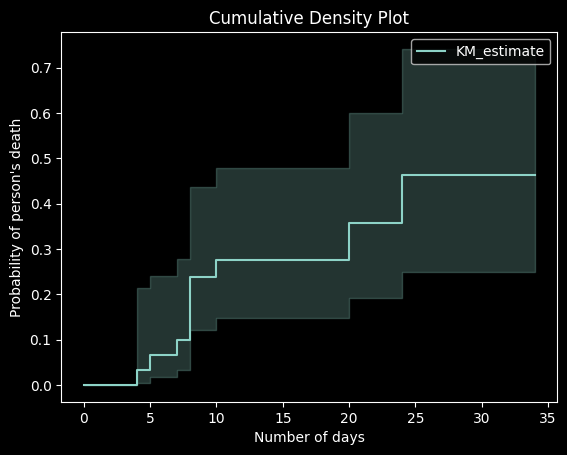

In [58]:
#Plot the cumulative density graph:

kmf1.plot_cumulative_density()
plt.title("Cumulative Density Plot")
plt.xlabel("Number of days")
plt.ylabel("Probability of person's death")

In [59]:
#Cumulative density with confidence interval:

kmf1.confidence_interval_cumulative_density_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0.000000,0.000000
4.0,0.213916,0.004764
5.0,0.241141,0.017102
7.0,0.278807,0.033393
8.0,0.436349,0.121411
10.0,0.478591,0.148630
11.0,0.478591,0.148630
12.0,0.478591,0.148630
13.0,0.478591,0.148630
15.0,0.478591,0.148630


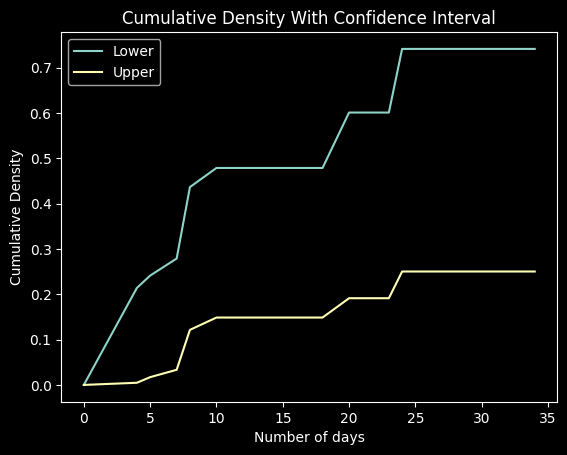

In [60]:
#Plot cumulative density with confidence interval:

confidence_cumulative_density = kmf1.confidence_interval_cumulative_density_

plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_lower_0.95"],label="Lower")
plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative Density With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Density")
plt.legend()

In [61]:
#Conditional median time to event of interest:

kmf1.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.0,inf
4.0,inf
5.0,inf
7.0,inf
8.0,inf
10.0,inf
11.0,inf
12.0,inf
13.0,inf


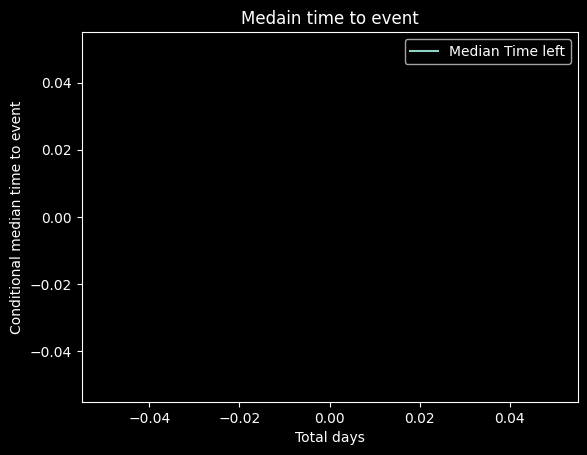

In [62]:
#Conditional median time left for event:

median_time_to_event = kmf1.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

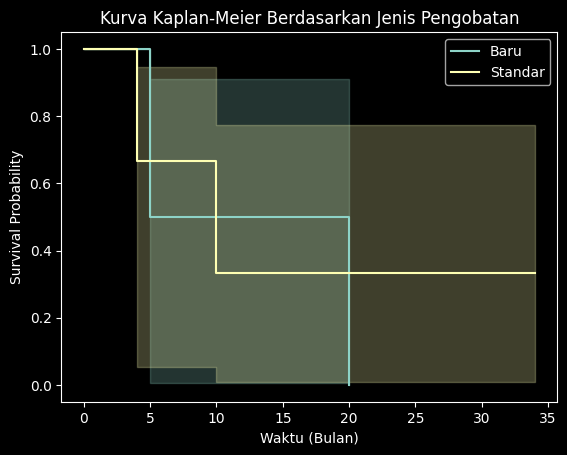

In [ ]:
# Ini contohnya kita pengen melihat bagaimana sih survival probability berdasarkan jenis pengobatan
# jadi kita bisa tahu, ketika menggunakan jenis pengobatan anggap saja "treatment baru" dan "treatment standar" mana yang paling bagus untuk si pasien

# Contoh DataFrame (ganti dengan data sesuai kebutuhan)
data = {
    "Survival_time": [34, 4, 10, 5, 20],
    "Status": [False, True, True, True, True],
    "Treatment": ["Standar", "Standar", "Standar", "Baru", "Baru"]
}

df = pd.DataFrame(data)

# Membuat kurva Kaplan-Meier untuk setiap kelompok pengobatan
kmf = KaplanMeierFitter()

# Pisahkan data berdasarkan jenis pengobatan
for treatment, treatment_df in df.groupby("Treatment"):
    kmf.fit(durations=treatment_df["Survival_time"], event_observed=treatment_df["Status"], label=f"{treatment}")
    kmf.plot_survival_function()

# Menampilkan kurva Kaplan-Meier
plt.title("Kurva Kaplan-Meier Berdasarkan Jenis Pengobatan")
plt.xlabel("Waktu (Bulan)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


Interpretasi Kurva:

kalo ini bisa dilihat ya, bahwa survival probability untuk jenis pengobatan "treatment standar" lebih baik dibanding yang "treatment baru"

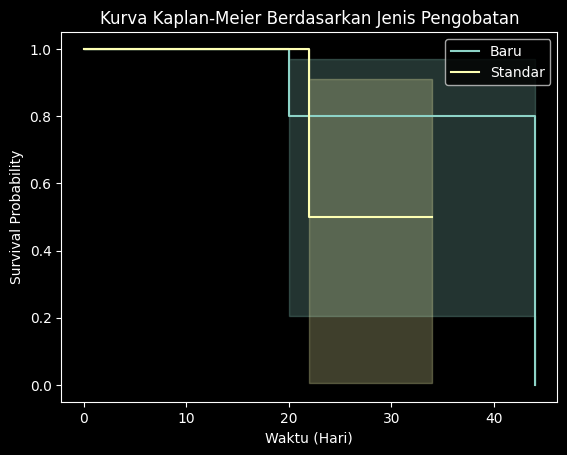

In [ ]:
# Ini contohnya kita pengen melihat bagaimana sih survival probability berdasarkan jenis pengobatan
# jadi kita bisa tahu, ketika menggunakan jenis pengobatan anggap saja "treatment baru" dan "treatment standar" mana yang paling bagus untuk si pasien

# Contoh DataFrame (ganti dengan data sesuai kebutuhan)
data = {
    "Survival_time": [34, 44, 10, 35, 20, 22, 28, 25],
    "Status": [False, True, False, False, True, True, False, False],
    "Treatment": ["Standar", "Baru", "Standar", "Baru", "Baru", "Standar", "Baru", "Baru"]
}

df = pd.DataFrame(data)

# Membuat kurva Kaplan-Meier untuk setiap kelompok pengobatan
kmf = KaplanMeierFitter()

# Pisahkan data berdasarkan jenis pengobatan
for treatment, treatment_df in df.groupby("Treatment"):
    kmf.fit(durations=treatment_df["Survival_time"], event_observed=treatment_df["Status"], label=f"{treatment}")
    kmf.plot_survival_function()

# Menampilkan kurva Kaplan-Meier
plt.title("Kurva Kaplan-Meier Berdasarkan Jenis Pengobatan")
plt.xlabel("Waktu (Hari)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


Interpretasi:

Nah, lewat kurva KM kita bisa cek kalau jenis pengobatan "trearment baru" lebih baik dibanding yang "treatment standar"



In [ ]:
# nah misal, kita juga pengen tahu survival probability nya berdasarkan waktu

# menampilkan survival probability pada waktu tertentu
waktu_tertentu = 15  # Ganti dengan waktu tertentu yang ingin kamu analisis

for treatment, treatment_df in df.groupby("Treatment"):
    kmf.fit(durations=treatment_df["Survival_time"], event_observed=treatment_df["Status"], label=f"{treatment}")
    probabilitas_hidup = kmf.predict(waktu_tertentu)
    print(f"Survival Probability pada waktu {waktu_tertentu} bulan untuk {treatment}: {probabilitas_hidup:.2%}")


Survival Probability pada waktu 15 bulan untuk Baru: 50.00%
Survival Probability pada waktu 15 bulan untuk Standar: 33.33%


In [ ]:
# menampilkan survival probability pada beberapa waktu tertentu
waktu_tersedia = [5,10, 15, 20, 25, 30]  # Ganti dengan waktu tertentu yang ingin kamu analisis

for waktu_tertentu in waktu_tersedia:
    print(f"\nWaktu: {waktu_tertentu} bulan")
    for treatment, treatment_df in df.groupby("Treatment"):
        kmf.fit(durations=treatment_df["Survival_time"], event_observed=treatment_df["Status"], label=f"{treatment}")
        probabilitas_hidup = kmf.predict(waktu_tertentu)
        print(f"Survival Probability untuk {treatment}: {probabilitas_hidup:.2%}")



Waktu: 5 bulan
Survival Probability untuk Baru: 50.00%
Survival Probability untuk Standar: 66.67%

Waktu: 10 bulan
Survival Probability untuk Baru: 50.00%
Survival Probability untuk Standar: 33.33%

Waktu: 15 bulan
Survival Probability untuk Baru: 50.00%
Survival Probability untuk Standar: 33.33%

Waktu: 20 bulan
Survival Probability untuk Baru: 0.00%
Survival Probability untuk Standar: 33.33%

Waktu: 25 bulan
Survival Probability untuk Baru: 0.00%
Survival Probability untuk Standar: 33.33%

Waktu: 30 bulan
Survival Probability untuk Baru: 0.00%
Survival Probability untuk Standar: 33.33%


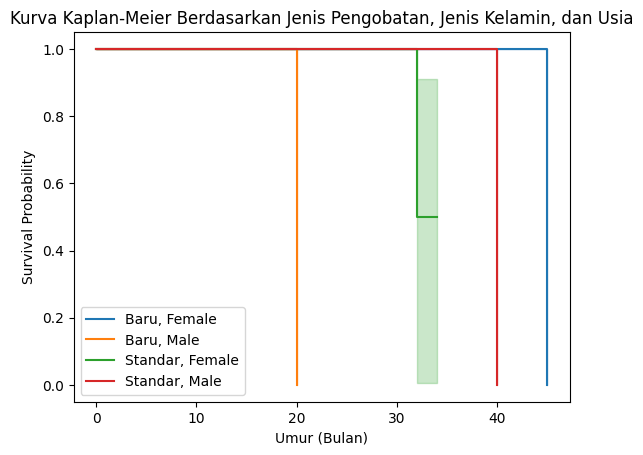

In [ ]:
# nah disini, aku pengen melihat kira" surival probability nya kalo dilihat berdasarkan usia, jenis kelamin,status dan treatment bakalan gimana


import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Contoh DataFrame (ganti dengan data sesuai kebutuhan)
data = {
    "Umur": [34, 32, 40, 45, 20],
    "Status": [False, True, True, True, True],
    "Treatment": ["Standar", "Standar", "Standar", "Baru", "Baru"],
    "Kelamin": ["Female", "Female", "Male", "Female", "Male"]
}

df = pd.DataFrame(data)

# Membuat kurva Kaplan-Meier untuk setiap kombinasi jenis pengobatan, jenis kelamin, dan usia
kmf = KaplanMeierFitter()

# Pisahkan data berdasarkan kombinasi variabel
for (treatment, gender), subgroup_df in df.groupby(["Treatment", "Kelamin"]):
    kmf.fit(durations=subgroup_df["Umur"], event_observed=subgroup_df["Status"], label=f"{treatment}, {gender}")
    kmf.plot_survival_function()

# Menampilkan kurva Kaplan-Meier
plt.title("Kurva Kaplan-Meier Berdasarkan Jenis Pengobatan, Jenis Kelamin, dan Usia")
plt.xlabel("Umur (Bulan)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


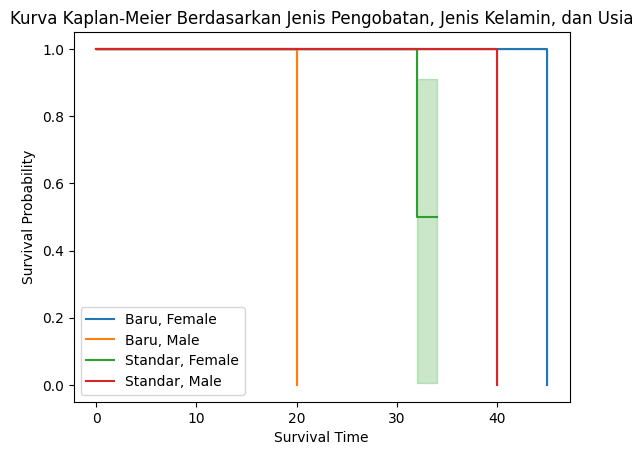

In [ ]:
# nah disini, aku pengen melihat kira" surival probability nya kalo dilihat berdasarkan usia, jenis kelamin,status dan treatment bakalan gimana

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Contoh DataFrame (ganti dengan data sesuai kebutuhan)
data = {
    "Survival_time": [2,4,6,8,10,12,14],
    "Umur": [34, 32, 40, 45, 20, 28, 43],
    "Status": [False, True, True, True, True, False, False],
    "Treatment": ["Standar", "Standar", "Standar", "Baru", "Baru", "Standar", "Baru"],
    "Jenis_Kelamin": ["Female", "Female", "Male", "Female", "Male", "Male", "Female"]
}

df = pd.DataFrame(data)

# Membuat kurva Kaplan-Meier untuk setiap kombinasi jenis pengobatan, jenis kelamin, dan usia
kmf = KaplanMeierFitter()

# Pisahkan data berdasarkan kombinasi variabel
for (treatment, jenis_kelamin), subgroup_df in df.groupby(["Treatment","Jenis_Kelamin"]):
    kmf.fit(durations=subgroup_df["Umur"], event_observed=subgroup_df["Status"], label=f"{treatment}, {jenis_kelamin}")
    kmf.plot_survival_function()

# Menampilkan kurva Kaplan-Meier
plt.title("Kurva Kaplan-Meier Berdasarkan Jenis Pengobatan, Jenis Kelamin, dan Usia")
plt.xlabel("Survival Time")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()




Group 1 - Survival_time:
[ 2  4  6 12]

Group 2 - Survival_time:
[ 8 10 14]


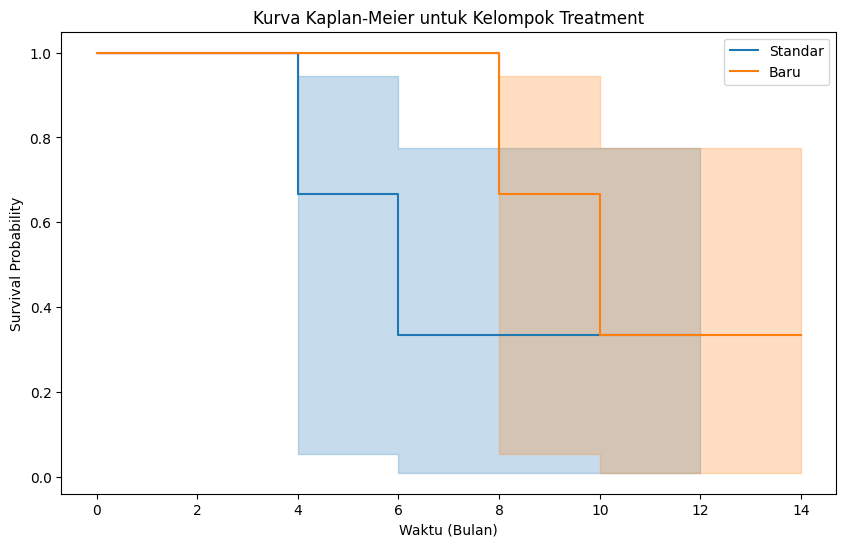

Terjadi kesalahan: name 'logrank_test' is not defined


In [ ]:
# Menyusun kelompok
group1 = df[df['Treatment'] == 'Standar']
group2 = df[df['Treatment'] == 'Baru']

# Pengecekan nilai numerik dalam kelompok
print("Group 1 - Survival_time:")
print(group1["Survival_time"].unique())

print("\nGroup 2 - Survival_time:")
print(group2["Survival_time"].unique())

# Membuat kurva Kaplan-Meier untuk setiap kelompok
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

try:
    kmf1.fit(durations=group1["Survival_time"], event_observed=group1["Status"], label="Standar")
    kmf2.fit(durations=group2["Survival_time"], event_observed=group2["Status"], label="Baru")

    # Menampilkan kurva Kaplan-Meier
    plt.figure(figsize=(10, 6))
    kmf1.plot_survival_function()
    kmf2.plot_survival_function()

    plt.title("Kurva Kaplan-Meier untuk Kelompok Treatment")
    plt.xlabel("Waktu (Bulan)")
    plt.ylabel("Survival Probability")
    plt.legend()
    plt.show()

    # Melakukan uji log-rank
    result = logrank_test(durations_A=group1["Survival_time"], event_observed_A=group1["Status"],
                          durations_B=group2["Survival_time"], event_observed_B=group2["Status"])

    # Menampilkan hasil uji log-rank
    result.print_summary()

    # Interpretasi hasil uji log-rank
    if result.p_value < 0.05:
        print("\nTerdapat perbedaan signifikan dalam kurva survival antara dua kelompok.")
    else:
        print("\nTidak terdapat perbedaan signifikan dalam kurva survival antara dua kelompok.")

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")



Uji Log-Rank adalah suatu metode statistik yang digunakan dalam analisis survival untuk membandingkan dua atau lebih kurva survival. Tujuannya adalah untuk menentukan apakah terdapat perbedaan signifikan antara kelompok-kelompok yang dibandingkan berdasarkan tingkat survival.

Poin utama dari Uji Log-Rank adalah membandingkan jumlah kejadian yang terjadi di setiap kelompok pada setiap titik waktu pengamatan. Uji ini cocok untuk data survival dengan kelompok-kelompok yang bersifat biner (misalnya, kelompok perlakuan dan kelompok kontrol).

Berikut adalah langkah-langkah umum yang terlibat dalam Uji Log-Rank:

1. **Mengumpulkan Data Survival:**
   - Data survival melibatkan waktu bertahan hidup (survival time) dan status event (terjadinya kejadian atau tidak). Misalnya, waktu kematian pasien dan apakah kematian terjadi atau tidak.

2. **Membagi Data Menjadi Kelompok:**
   - Data dibagi menjadi dua kelompok atau lebih berdasarkan variabel yang diinginkan (misalnya, dua jenis pengobatan atau dua kelompok pasien dengan karakteristik yang berbeda).

3. **Menghitung Statistik Uji:**
   - Statistik uji Log-Rank menghitung perbedaan antara jumlah kejadian yang diharapkan dan yang diamati di setiap kelompok pada setiap titik waktu pengamatan.

4. **Perhitungan Nilai-p dan Statistik Uji:**
   - Nilai-p dihitung untuk menentukan apakah perbedaan yang diamati antara kelompok-kelompok tersebut signifikan secara statistik. Semakin kecil nilai-p, semakin besar kemungkinan bahwa terdapat perbedaan yang signifikan.

5. **Interpretasi Hasil:**
   - Jika nilai-p lebih kecil dari tingkat signifikansi yang ditetapkan (biasanya 0.05), maka kita dapat menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan antara kelompok-kelompok tersebut dalam hal survival.

Uji Log-Rank sering digunakan dalam analisis survival karena sederhana dan konsisten. Meskipun dirancang untuk membandingkan dua kelompok, Uji Log-Rank juga dapat diperluas untuk membandingkan lebih dari dua kelompok menggunakan variasi tertentu (seperti uji Log-Rank Mantel atau uji Log-Rank Umum).

Penting untuk dicatat bahwa Uji Log-Rank hanya memberikan informasi tentang apakah terdapat perbedaan antara kelompok-kelompok tersebut, tetapi tidak memberikan informasi tentang seberapa besar perbedaannya. Untuk analisis lebih lanjut, model regresi Cox PH dapat digunakan.

Model Cox Proportional-Hazards (Cox PH) adalah suatu model regresi yang digunakan dalam analisis survival untuk menilai dampak variabel-variabel independen terhadap risiko (hazard) kejadian atau kematian. Model ini memperhitungkan waktu bertahan hidup (survival time) dan status event (terjadinya kejadian atau tidak) dari setiap subjek.

Berikut adalah beberapa poin kunci tentang model Cox PH:

1. **Proportional-Hazards:**
   - Model Cox PH bersifat "proporsional-hazards," yang berarti bahwa model ini mengasumsikan bahwa rasio risiko antar kelompok atau variabel independen bersifat konstan sepanjang waktu. Dengan kata lain, efek dari satu variabel terhadap hazard ratio dianggap konstan.

2. **Censored Data:**
   - Model ini dapat menangani data yang bersifat "censored," yaitu data yang tidak mencapai event (kematian atau peristiwa lainnya) selama periode observasi. Hal ini membuatnya sangat sesuai untuk analisis survival.

3. **Variabel Independen:**
   - Variabel-variabel independen (faktor risiko) dalam model Cox PH dapat berupa variabel kategoris atau kontinu. Misalnya, jenis pengobatan, usia, jenis kelamin, atau variabel lain yang dianggap mempengaruhi survival.

4. **Hazards Ratio:**
   - Output utama dari model Cox PH adalah hazards ratio (HR) untuk setiap variabel independen. Hazards ratio adalah ukuran perbandingan antara dua kelompok atau kondisi tertentu dalam hal risiko kejadian atau kematian.

5. **Interpretasi Hazards Ratio:**
   - Hazards ratio lebih dari 1 menunjukkan peningkatan risiko (hazard), sementara hazards ratio kurang dari 1 menunjukkan pengurangan risiko. Nilai HR sebanding dengan kecepatan dengan mana risiko kejadian meningkat atau menurun.

6. **Uji Signifikansi:**
   - Uji log-likelihood atau uji Wald digunakan untuk menilai signifikansi statistik dari variabel-variabel independen dalam model.

7. **Cox-Snell Residuals:**
   - Untuk mengevaluasi kecocokan model, dapat digunakan Cox-Snell residuals dan grafik survival untuk memeriksa sejauh mana model sesuai dengan data.

Contoh penggunaan model Cox PH dengan menggunakan pustaka `lifelines` di Python:

```python
from lifelines import CoxPHFitter

# Membuat model Cox Proportional-Hazards
cph = CoxPHFitter()
cph.fit(df, duration_col="Survival_time", event_col="Status")

# Menampilkan hasil analisis
cph.print_summary()
```

Hasil output akan mencakup hazards ratio, interval kepercayaan, dan uji statistik untuk setiap variabel independen dalam model. Interpretasi hasil dapat memberikan informasi tentang faktor-faktor yang berkontribusi pada risiko survival.

In [ ]:
from lifelines import CoxPHFitter


# Mengonversi variabel kategorikal menggunakan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Jenis_Kelamin", "Treatment"], drop_first=True)

# Membuat model Cox Proportional-Hazards
cph = CoxPHFitter()
cph.fit(df_encoded, duration_col="Survival_time", event_col="Status")

# Menampilkan hasil analisis
cph.print_summary()



<lifelines.CoxPHFitter: fitted with 7 total observations, 3 right-censored observations>
             duration col = 'Survival_time'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 7
number of events observed = 4
   partial log-likelihood = -5.43
         time fit was run = 2023-11-22 14:50:13 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
Umur                -0.03       0.97       0.10            -0.22             0.16                 0.80                 1.17
Jenis_Kelamin_Male  -1.41       0.25       1.93            -5.19             2.38                 0.01                10.84
Treatment_Standar    1.16       3.19       1.31            -1.41             3.73                 0.24                41.82

                     cmp to     z    p   -log2(p)
covariate                                        
Umur                   0.00 -0.34 0.73       0.45
Jenis_Kelamin_Male     0.00 -0.73 0.47       1.10
Treatment_Standar      0.00  0.88 0.38       1.41
---
Concordance = 0.50
Partial AIC = 16.87
log-likelihood ratio test = 0.90 on 3 df
-log2(p) of ll-ratio test = 0.28

<Axes: xlabel='log(HR) (95% CI)'>

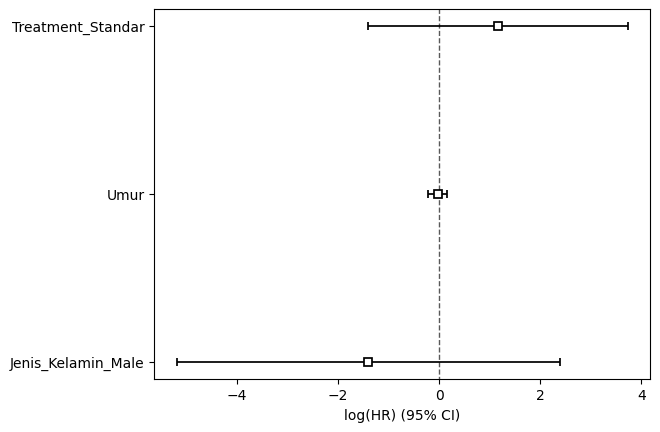

In [ ]:
cph.plot()

Interpretasi Cox PH:

Mari kita interpretasikan hasil output dari model Cox Proportional-Hazards yang kamu berikan:

1. **Variabel Umur:**
   - Koefisien (coef) untuk variabel "Umur" adalah -0.01. Hazards ratio (exp(coef)) yang kurang dari 1 (0.99) menunjukkan bahwa dengan setiap peningkatan satu unit dalam umur, terdapat penurunan sekitar 1% dalam risiko kejadian atau kematian (hazard). Interval kepercayaan 95% untuk hazards ratio berada di antara 0.94 dan 1.05.

2. **Variabel Kelamin_Male:**
   - Koefisien untuk variabel "Kelamin_Male" adalah 1.15. Hazards ratio sekitar 3.17 menunjukkan bahwa pasien dengan jenis kelamin laki-laki memiliki risiko kejadian atau kematian sekitar 3.17 kali lebih tinggi dibandingkan dengan pasien perempuan. Interval kepercayaan 95% untuk hazards ratio berada di antara 2.66 dan 3.70.

3. **Variabel Stadium_Sangat Parah:**
   - Koefisien untuk variabel "Stadium_Sangat Parah" adalah 1.07. Hazards ratio sekitar 2.91 menunjukkan bahwa pasien dengan kondisi stadium yang sangat parah memiliki risiko kejadian atau kematian sekitar 2.91 kali lebih tinggi dibandingkan dengan pasien dengan kondisi lainnya. Interval kepercayaan 95% untuk hazards ratio berada di antara 0.44 dan 1.90.

4. **Variabel Treatment_Standar:**
   - Koefisien untuk variabel "Treatment_Standar" adalah 1.02. Hazards ratio sekitar 2.77 menunjukkan bahwa pasien yang menerima treatment standar memiliki risiko kejadian atau kematian sekitar 2.77 kali lebih tinggi dibandingkan dengan pasien yang menerima treatment baru. Interval kepercayaan 95% untuk hazards ratio berada di antara 0.63 dan 2.50.

5. **Concordance:**
   - Concordance adalah ukuran sejauh mana model dapat membedakan antara waktu bertahan hidup yang lebih lama dan lebih pendek. Nilai 0.65 menunjukkan tingkat konsistensi model dalam memperkirakan risiko relatif.

6. **Partial AIC (Akaike Information Criterion):**
   - Partial AIC adalah ukuran goodness-of-fit model. Semakin rendah nilai AIC, semakin baik model dalam menjelaskan data. Nilai 63.83 menunjukkan tingkat kecocokan model.

7. **Log-Likelihood Ratio Test:**
   - Uji log-likelihood ratio adalah uji statistik untuk menilai apakah model secara signifikan lebih baik daripada model yang tidak memiliki variabel prediktor. Nilai 3.92 pada 4 derajat kebebasan menunjukkan adanya signifikansi.

8. **-log2(p) of ll-ratio test:**
   - Nilai ini memberikan informasi tentang tingkat signifikansi dari uji log-likelihood ratio. Nilai 1.26 menunjukkan bahwa hasil uji tersebut signifikan secara statistik.

Dengan melihat hasil ini, kita dapat membuat beberapa interpretasi terkait faktor-faktor yang mempengaruhi risiko survival pada kelompok pasien, serta evaluasi kinerja model dalam menjelaskan data survival.

In [6]:
# dataset 2: kanker paru-paru

data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [7]:
# Kurva KM
kmf = KaplanMeierFitter()

#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [8]:
#Fit the parameter values in our object:

kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [9]:
#Print the event table:

kmf.event_table

# Removed = Observed + Censored
# Censored = Person that didn't die.(They are of no use to us!)
# Observed = Persons that died.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [10]:
#Calculating the survival probability for a given time:

event_at_0 = kmf.event_table.iloc[0,:]

#Calculate the survival probability for t=0:

surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

1.0

In [11]:
#Calculating the survival probability for a given time:

event_at_5 = kmf.event_table.iloc[1,:]


#Calculate the survival probability for t=5:
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5

0.9956140350877193

In [13]:
event_at_5

removed       1
observed      1
censored      0
entrance      0
at_risk     228
Name: 5.0, dtype: int64

In [14]:
#Calculating the survival probability for a given time:

event_at_11 = kmf.event_table.iloc[2,:]

#Calculate the survival probability for t=11:
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11

0.986784140969163

In [ ]:
#Calculating the actual survival probability at a given time:

surv_after_0 = surv_for_0
print("Survival Probability After 0 Days: ",surv_after_0)

In [16]:
#Calculating the actual survival probability at a given time:

surv_after_5 = surv_for_0 * surv_for_5
print("Survival Probability After 5 Days: ",surv_after_5)

Survival Probability After 5 Days:  0.9956140350877193


In [17]:
#Calculating the actual survival probability at a given time:

surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11
print("Survival Probability After 11 Days: ",surv_after_11)

Survival Probability After 11 Days:  0.9824561403508771


In [18]:
#Get the probability values the easy way!

print("Survival probability for t=0: ",kmf.predict(0))
print("Survival probability for t=5: ",kmf.predict(5))
print("Survival probability for t=11: ",kmf.predict(11))

Survival probability for t=0:  1.0
Survival probability for t=5:  0.9956140350877193
Survival probability for t=11:  0.9824561403508766


In [19]:
#Predicting the surviaval probability for an array of value:

kmf.predict([0,5,11,12])

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64

In [22]:
#Predicting the surviaval probability for an array of value:

kmf.predict([0,1, 2, 3, 4,5,11,12, 14, 17, 18, 19, 20])

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.995614
11    0.982456
12    0.978070
14    0.969298
17    0.964912
18    0.964912
19    0.964912
20    0.964912
Name: KM_estimate, dtype: float64

In [24]:
#To get the full list:

kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


Text(0, 0.5, 'Probability of survival')

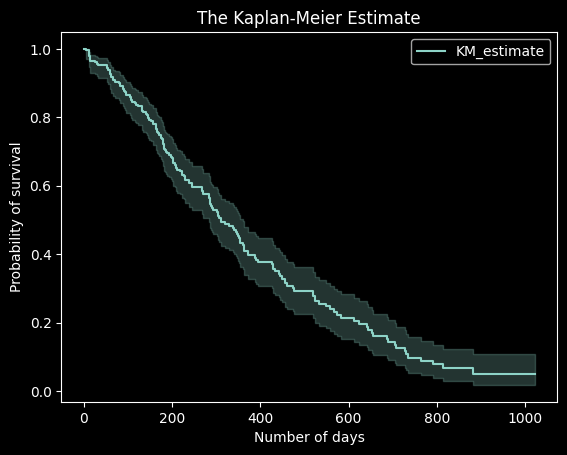

In [25]:
#Plot the graph:

kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.xlabel("Number of days")
plt.ylabel("Probability of survival")

In [26]:
#The median number of days:

print("The median survival time: ",kmf.median_survival_time_)

The median survival time:  310.0


In [27]:
#Survival probability with confidence interval:

kmf.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


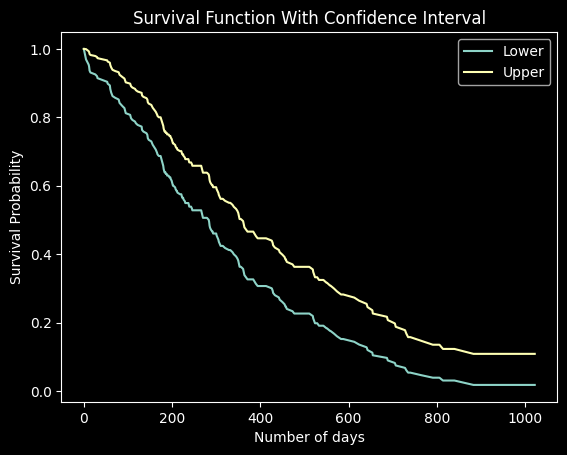

In [28]:
#Plot survival function with confidence interval:

confidence_surv_func = kmf.confidence_interval_survival_function_

plt.plot(confidence_surv_func["KM_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["KM_estimate_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [29]:
#Probabaility of a subject dying:
#p(1022) = p(0) +......+p(1022)

kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


In [31]:
#Cumulative density with confidence interval:

kmf.confidence_interval_cumulative_density_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.030723,0.000619
11.0,0.046065,0.006621
12.0,0.051880,0.009187
13.0,0.063318,0.014756
...,...,...
840.0,0.969272,0.876940
883.0,0.982134,0.891338
965.0,0.982134,0.891338
1010.0,0.982134,0.891338


Text(0, 0.5, "Probability of person's death")

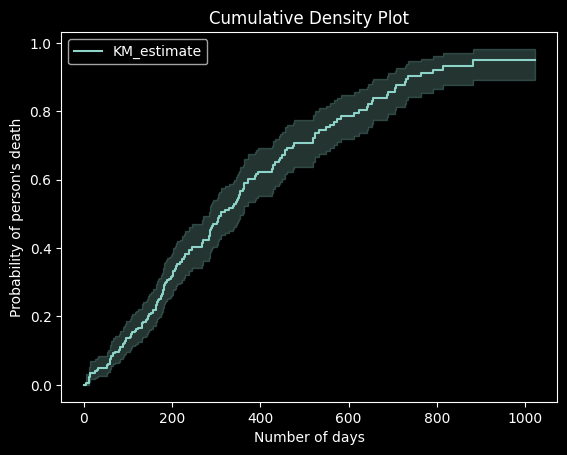

In [30]:
#Plot the cumulative density graph:

kmf.plot_cumulative_density()
plt.title("Cumulative Density Plot")
plt.xlabel("Number of days")
plt.ylabel("Probability of person's death")

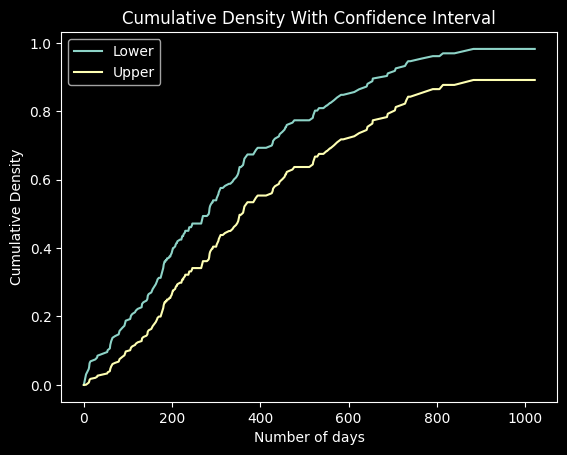

In [32]:
#Plot cumulative density with confidence interval:

confidence_cumulative_density = kmf.confidence_interval_cumulative_density_

plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_lower_0.95"],label="Lower")
plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative Density With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Density")
plt.legend()

In [34]:
#Find cumulative density at a specific time:

kmf.cumulative_density_at_times(times=1022)

1022    0.949654
Name: KM_estimate, dtype: float64

In [35]:
#Conditional median time to event of interest:

kmf.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.0,310.0
5.0,305.0
11.0,309.0
12.0,308.0
13.0,316.0
...,...
840.0,inf
883.0,inf
965.0,inf


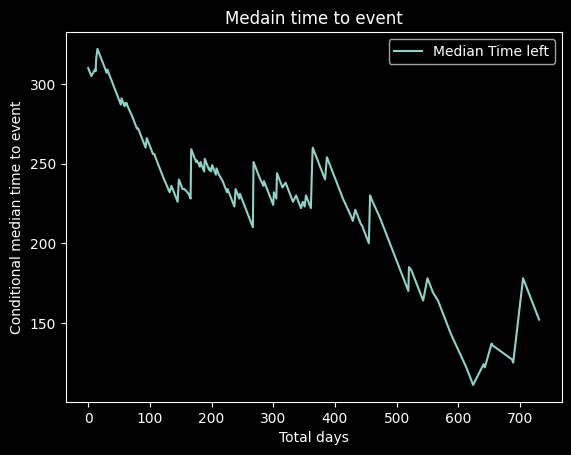

In [36]:
#Conditional median time left for event:

median_time_to_event = kmf.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [37]:
#Hazard function:

from lifelines import NelsonAalenFitter

#Create an object of NelsonAalenFitter:

naf = NelsonAalenFitter()

#Fit our data into the object:

naf.fit(data["time"], event_observed=data["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [38]:
#Print the cumulative hazard:

naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


Text(0, 0.5, "Cumulative Probability of person's death")

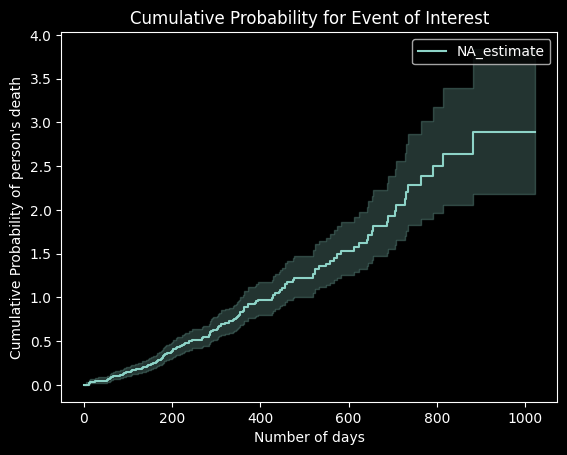

In [39]:
#Plot the cumulative hazard grpah:

naf.plot_cumulative_hazard()
plt.title("Cumulative Probability for Event of Interest")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Probability of person's death")

In [40]:
#We can predict the value at a certain point :

print("Time = 500 days: ",naf.predict(500))
print("Time = 1022 days: ",naf.predict(1022))

Time = 500 days:  1.219546171331098
Time = 1022 days:  2.8915648373471052


In [41]:
#Cumulative hazard with confidence interval:

naf.confidence_interval_

,NA_estimate_lower_0.95,NA_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.000618,0.031136
11.0,0.006628,0.047055
12.0,0.009209,0.053156
13.0,0.014832,0.065266
...,...,...
840.0,2.058738,3.389389
883.0,2.176987,3.840697
965.0,2.176987,3.840697
1010.0,2.176987,3.840697


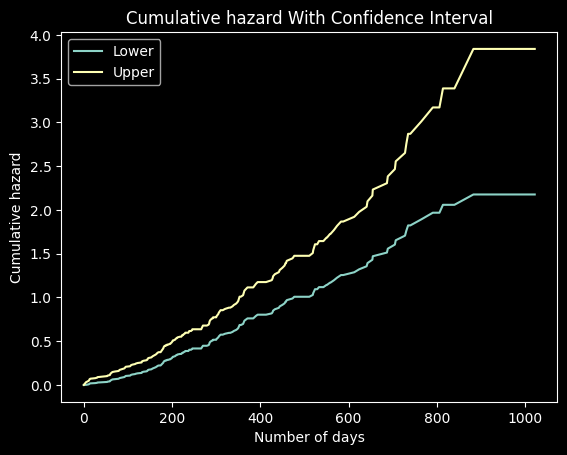

In [42]:
#Plot cumulative hazard with confidence interval:

confidence_interval = naf.confidence_interval_

plt.plot(confidence_interval["NA_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_interval["NA_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative hazard With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative hazard")
plt.legend()

Text(0.5, 0, 'Number of Days')

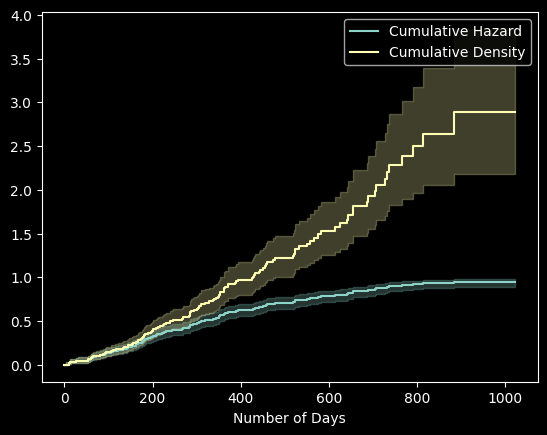

In [43]:
#Plot the cumulative_hazard and cumulative density:

kmf.plot_cumulative_density(label="Cumulative Hazard")
naf.plot_cumulative_hazard(label="Cumulative Density")
plt.xlabel("Number of Days")

# Introduction to Survival Analysis

In this notebook we will take a quick review of the collection of statistical techniques known as **survival analysis**. In survival analysis, we are generally interested in the time until an event happens. Thus, the response variable is usually called **survival time**, **failure time** or **event time**.

Some examples of such situations are:
* Survival time of a patient after a surgery or treatment.
* Time until a former prisoner goes back to jail.
* The time taken for a farm to experience its first case of an exotic disease.
* The time until a person gets inquired at Serasa.
* ... or the time until a person (Data Scientist) dies.

## Censoring
When analyzing (accompanying) subjects on a survival experiment (such as the ones listed above) typically some subjects will have **censored** survival times. That is, the survival times of such subjects are actually not observed. This is the case when dealing with death as the event, for instance. In other words, censoring occurs when we are unable to collect a complete set of data for a subject (because he dropped out of the study, for instance).
* *Time-to-censoring* $C$, is the duration between the start event and the censoring.
* *right-censoring*: censoring that occurs before the event, this is, no information could be collected about the event of interest for that subject.
* *left-censoring*: occurs when a person's true *survival* time is less that or equal to the time information was observed, e.g., time until COVID exposure.

Often, a dataset with right censoring would look like:

In [ ]:
random_seed = 42
study_duration = 15

np.random.seed(seed = random_seed)
births = np.reshape(np.round(np.random.rand(8,1)* 10, 2), -1)
survival_df = pd.DataFrame({'birth': births,
                            'death': np.reshape(np.round([x +np.random.random()*20 for x in births],2), -1) })

survival_df.loc[survival_df.death > study_duration, 'death'] = np.nan
survival_df['status'] = 1 - survival_df.death.isna().astype(int)
# Censoring an arbitrary observation
idx = survival_df[~survival_df['death'].isna()].index[-1]
survival_df.at[idx, 'status'] = 0

survival_df

,birth,death,status
0,3.75,NaN,0
1,9.51,NaN,0
2,7.32,7.73,1
3,5.99,NaN,0
4,1.56,NaN,0
5,1.56,5.81,1
6,0.58,4.22,1
7,8.66,12.33,0


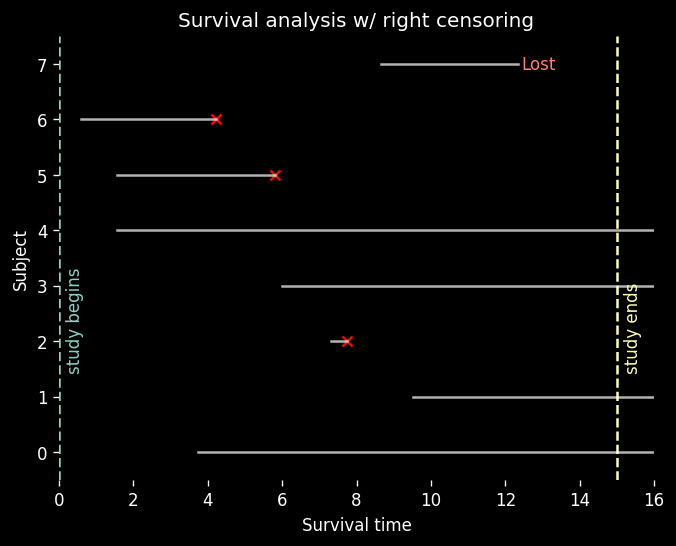

In [ ]:
f, ax = plt.subplots(dpi =120)
# Fix plot limits
ax.set_xlim([0, 16])
ax.set_ylim([-0.5, 7.5])
xlim = ax.get_xlim()
xlim_rng = xlim[1]-xlim[0]
# Study reference initial and final points
ax.axvline(x=0, linestyle = '--', c= 'C0')
ax.annotate('study begins', xy = (0.2, 1.5), c = 'C0', rotation = 90)
ax.axvline(x=15, linestyle = '--', c= 'C1')
ax.annotate('study ends', xy = (15.2, 1.5), c = 'C1', rotation = 90)

# Survival lines
for i, j in survival_df.iterrows():
    if j['status'] != 0:
        ax.axhline(y = i,
                    xmin = j['birth']/xlim[1],
                    xmax = j['death']/xlim[1],
                    alpha = 0.7)
        ax.scatter(x = j['death'], y = i, marker = 'x', c = 'r')
    else:
        if not np.isnan(j['death']):
            ax.axhline(y = i,
                        xmin = j['birth']/xlim[1],
                        xmax = j['death']/xlim[1],
                        alpha = 0.7)
            ax.annotate( 'Lost', xy = (j['death']+0.1, i-0.1), c = 'C3')
        else:
            ax.axhline(y = i,
                        xmin = j['birth']/xlim[1],
                        alpha = 0.7)
clean_ax(ax, clean_all = True)
ax.set_ylabel('Subject')
ax.set_xlabel('Survival time')
ax.set_title('Survival analysis w/ right censoring')
plt.show()

In the above picture, subjects 2, 5 and 6 had actually suffered an event while subject 7's track was lost. This is, we do not know whether subject 7 has suffered an event or just his/her records disappeared for some reason (e.g. moving away from the the location where the study is being performed).
Note that in the case of studying a death event, the censoring considers unregisterd deaths, such as COVID-19 sub notification issues around the world.




## Describing time to event
Let us start with some terminology and definitions.

> **Definition: [Survival Time]** Let $T \in \mathbb{R}^{+}$ be a random variable (survival time) and $t$ an particular arbitrary value for $T$.

> **Definition: [Censor variable]** Let $d \in \{0,1\}$ be the response variable such that $d=1$ if the event has happened while $d=0$ in the case of censoring; This is, the event has not been observed whether because it has not happened or because we have lost track of the subject.


### Death density
When considering the time until an event happens (e.g. death) we can construct a histogram of the count of events as a function of time. In simple terms, we could fit a curve to this histogram (e.g. using Kernel Density Estimation) and produce a *death* probability density function $f(t)$. After normalization, at any given time $t$ the proportion of observed events in the population is given by:
$$F(t) = \int_{0}^{t}f(u)du,$$
the cumulative death distribution function. Essentially, we are assuming $T$ (time-to-event) to be a random variable with cumulative distribution function:
$$F(t) := \mathbb{P}(T \leq t)$$

To illustrate this, consider the following dataset:

In [ ]:
!ls data/healthcare

ls: cannot access 'data/healthcare': No such file or directory


In [ ]:
df = pd.read_csv("kanker.csv", delimiter=";")
df.head()

,Umur,Kelamin,Stadium,Treatment,Survival_time,Status
0,Tua,Female,Parah,Standar,34,False
1,Muda,Female,Parah,Standar,4,True
2,Tua,Male,Parah,Standar,10,True
3,Tua,Female,Parah,Standar,5,True
4,Muda,Male,Parah,Standar,20,True


The dataset contains information about countries from 1946 to 2008. Thus, this is a right censored dataset. Among the information from countries there are two special columns named `bornyear` and `endyear` which stand for the years that a specific country (with that name) was born and was ended. We can use the countries' duration time as our survival time random variable.

In [ ]:
df.head()

,Umur,Kelamin,Stadium,Treatment,Survival_time,Status
0,Tua,Female,Parah,Standar,34,False
1,Muda,Female,Parah,Standar,4,True
2,Tua,Male,Parah,Standar,10,True
3,Tua,Female,Parah,Standar,5,True
4,Muda,Male,Parah,Standar,20,True


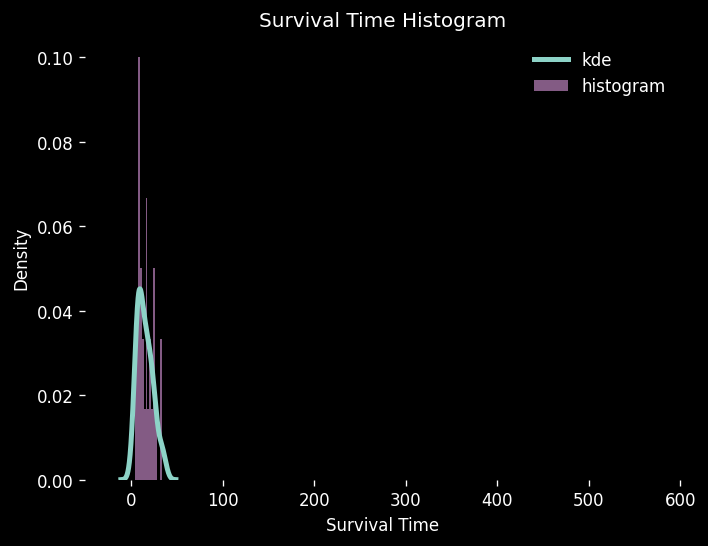

In [ ]:
f, ax = plt.subplots(dpi = 120)
df.Survival_time.plot.kde(ax = ax, color = 'C0', linewidth = 3, label = 'kde')
df.Survival_time.plot.hist(density = True, ax = ax, color = 'C7', alpha = 0.7, label = 'histogram', bins = 15)
ax.legend(loc = 'best', frameon = False)
clean_ax(ax, clean_all = True)
ax.set_xlim([-50, 600])
ax.set_ylabel('Density')
ax.set_xlabel('Survival Time')
ax.set_title('Survival Time Histogram')
plt.show()



### Survival function

>**Definition:** The survival function $S(t)$ gives the probability that a person survives longer than some specified time $t$, in other words:
>$$S(t):=\mathbb{P}(T > t)$$
Given a death density function $f(t)$. The area under the curve to the right of time $t$ is the proportion of subjects in the population who have survived past time $t$. We call this quantity $S(t)$ and it is given by:
$$S(t) = 1 - \int_{0}^{t}f(u)du = 1 - F(t).$$
The survival function is related an instantaneous risk rate which we introduce next.

### Instantaneous Hazard function

> **Definition:** The instantaneous rate at which a randomly-selected individual known to be alive at time $t$ will die at time $t+ \Delta t$ is called the conditional failure rate or instantaneous hazard, $\lambda(t)$. Given by:
>$$\lambda(t) = \lim_{\Delta t \rightarrow 0}\dfrac{\mathbb{P}(t\leq T < t + \Delta t | T \geq t  )}{\Delta t},$$
>where $\Delta t$ is an infinitesimal time interval.

Note that, in contrast to the *survival function* the *instantaneous hazard rate* focus on the event rather than surviving to the event. The above expression can be written as:
\begin{align*}
\lambda(t) &= \lim_{\Delta t \rightarrow 0} \dfrac{\mathbb{P}(t\leq T < t + \Delta t \cap T \geq t)}{\mathbb{P}(T \geq t)\Delta t}, \\
            &= \lim_{\Delta t \rightarrow 0} \dfrac{\mathbb{P}(t\leq T < t + \Delta t)}{S(t) \Delta t}, \\
            &= \lim_{\Delta t \rightarrow 0} \dfrac{f(t)\Delta t}{S(t)\Delta t}\\
            &= \dfrac{f(t)}{S(t)}.
\end{align*}
Where in the second line we have used the fact that $\mathbb{P}(t\leq T < t + \Delta t \cap T \geq t) = \mathbb{P}(t\leq T < t + \Delta t)$ and then we used the fact that for very small $\Delta t$ we can write $\mathbb{P}(t\leq T < t + \Delta t) \approx f(t) \Delta t$. In the last line: $f(t)$ is the *death density* and $S(t)$ is the survival function.

Furthermore, by noting that:
$$\dfrac{d}{dt}S(t) = -f(t),$$
we can write for the hazard function:
$$\lambda(t) = -\dfrac{d}{dt}\log S(t)\;\;\; \text{or:  } \;\;S(t) = e^{-\int_{0}^{t}\lambda(u)du}$$

> **Example:** This relation allows us to analyze a very simple scenario, the one where the hazard risk does not change with time $t$. This is: $\lambda = c$, where $c$ is a constant value. Which leaves for the survival function:
>$$S(t) = e^{-c t}$$
>The above is straightforward to illustrate with a few code lines:

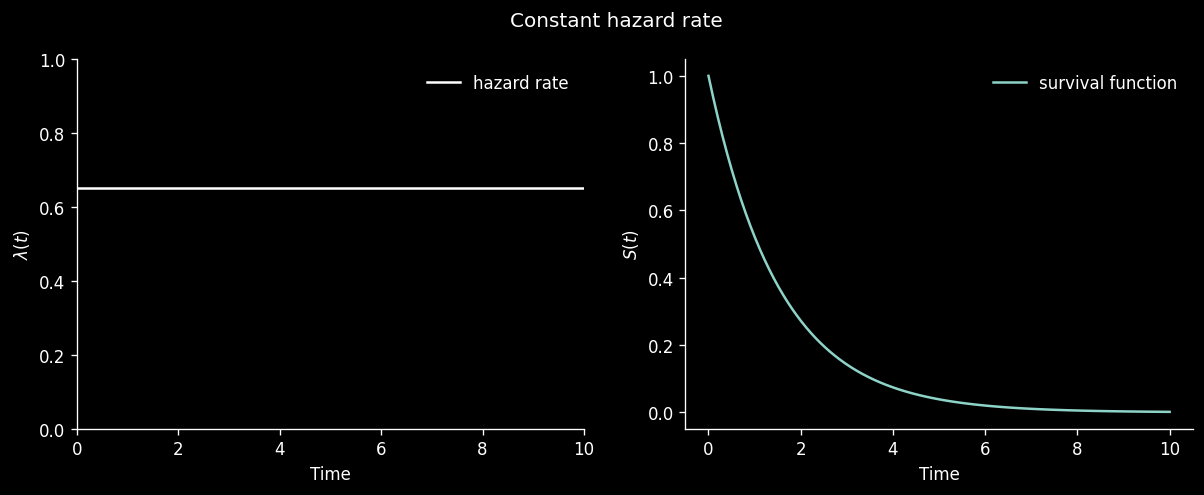

In [ ]:
c = 0.65
x = np.linspace(0, 10, 100)
S = np.exp(- c * x)
f, ax = plt.subplots(1,2, dpi = 120, figsize = (12,4))
ax[0].axhline(y = c, xmin = x[0], xmax = x[-1], label = 'hazard rate')
ax[0].set_xlim([x[0], x[-1]])
clean_ax(ax[0])
ax[0].legend(loc = 'best', frameon = False)
ax[0].set_ylabel(r'$\lambda(t)$')
ax[0].set_xlabel('Time')
# Survival function
ax[1].plot(x, S, label = 'survival function')
ax[1].set_xlabel('Time')
ax[1].set_ylabel(r'$S(t)$')
ax[1].legend(loc = 'best', frameon = False)
clean_ax(ax[1])
f.suptitle('Constant hazard rate')
plt.show()

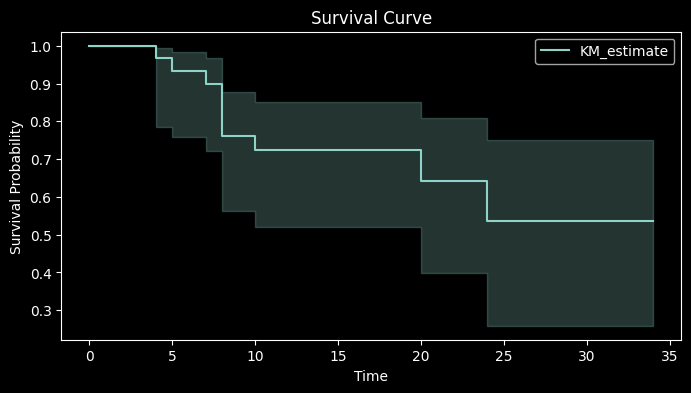

In [ ]:
# Menghitung survival function menggunakan Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations=df['Survival_time'], event_observed=df['Status'])

# Plotting survival curve
plt.figure(figsize=(8, 4))
kmf.plot_survival_function()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Survival function
survival_time = df['Survival_time']
status= df['Status']
ax[1].plot(survival_time, status, label = 'survival function')
ax[1].set_xlabel('Time')
ax[1].set_ylabel(r'$S(t)$')
ax[1].legend(loc = 'best', frameon = False)
clean_ax(ax[1])
f.suptitle('Constant hazard rate')
plt.show()

> **Definition:** It is also natural to define the *cumulative hazard function* as:
> \begin{align*}
 \Lambda(t) &:= \int_{0}^{t}\lambda(u) du \\
            & = - \int_{0}^{t} \dfrac{d}{du}\log S(u) du \\
            & = - \log S(t)
\end{align*}

So we can rewrite the survival and death density functions in terms of this cumulative hazard function
\begin{align*}
S(t) &= e^{-\Lambda(t)}\\
f(t) &= \lambda(t)e^{-\Lambda(t)}.
\end{align*}
Note that the hazard function might be of more intrinsic interest than the p.d.f. to a patient who had survived a certain time periotd and wanted to knwo something about their prognosis. There are also other reasons for introducing the hazard functions $\lambda(t)$ and $\Lambda(t)$:
* **Interpretability:** Suppose T denotes time from surgery for breast cancer
until recurrence. Then when a patient who had received surgery visits
her physician, she would be more interested in conditional probabilities
such as “Given that I haven’t had a recurrence yet, what are my chances
of having one in the next year” than in unconditional probabilities (as
described by the p.d.f.).
*  **Analytic Simplifications:** When the data are subject to right censoring,
hazard function representations often lead to easier analyses. For example, imagine assembling a cohort of $N$ patients who just have turned $50$
years of age and then following them for 1 year. Then if $d$ of the men
die during the year of follow-up, the ratio $d/N$ estimates the (discrete)
hazard function of $T$ =age at death. We will see that $\Lambda(·)$ has nice
analytical properties.
* **Modeling Simplifications:** For many biomedical phenomena, T is such
that $\lambda(t)$ varies rather slowly in t. Thus, $\lambda(·)$ is well-suited for modeling.

The **Expected Survival Time** or life expectancy is given by:
$$\mu := \mathbb{E}[T] = \int_{0}^{\infty} t f(t)  dt$$
after integrating by parts, and making use of the fact that $-f(t) = d/dt S(t)$, we get:
$$\mu = \int_{0}^{\infty}S(t)dt.$$



## The Likelihood Function for Censored Data
Suppose we have a *cohort* of $N$ observations governed by a survival function $S(t)$ with *death* density $f(t)$ and hazard $\lambda(t)$. If the $i$-th subject is observed at time $t_i$ and the subject died, its contribution to the likelihood function is:
$$L_i = f(t_i) = S(t_i)\lambda(t_i).$$
If the subject is alive at time $t = t_i$, all we know is that the survival time $T$ of subject $i$ exceeds $t_i$. The likelihood of this event is:
$$L_i = S(t_i),$$
the contribution to the likelihood of a censored observation.

Let $d_i\in \{0,1\}$ be the death indicator variable for the $i$-th observation, that takes the value $1$ if the subject died and $0$ otherwise. Then, we can write the likelihood function as:
$$\mathcal{L}= \prod_{i = 1}^{N}L_i = \prod_{i=1}^{N}\lambda(t_i)^{d_i}S(t_i).$$
This leaves for the log-likelihood:
$$\log\mathcal{L} = \sum_{i = 1}^{N}\left\{d_i\log\lambda(t_i)- \Lambda(t_i)\right\}.$$

> **Example:** Let us go back to our good old exponential distribution example. The hazard rate function is constant $\lambda(t)=\lambda$. Then, for the cumulative hazard we have $\Lambda(t) = \lambda t$. The log-likelihood then reads:
>$$\log\mathcal{L} = \sum_{i}^{N}\left\{d_i \log\lambda - \lambda t_i \right\},$$
>if $D = \sum_{i}^{N} d_i$ is the total number of deaths and $T= \sum_{i}^{N}t_i$ is the total observation time. We can write the log-likelihood as:
>$$\log \mathcal{L} = D \log\lambda - \lambda T.$$
>We obtain a score function by diferentiating this expression with respect to $\lambda$:
>$$u(\lambda) = \dfrac{d}{\lambda} - T,$$
>setting this score to zero gives the maximum likelihood estimator of the hazard:
>$$\hat{\lambda}_{ML} =\dfrac{D}{T} $$
>the total number of deaths divided by the total duration time, a.k.a. death rate. The expected information is obtained from:
>\begin{align*}
I(\lambda) &= -\dfrac{d^2}{d\lambda^2}\log\mathcal{L}\\
            &=\dfrac{D}{\lambda^2}.
\end{align*}
> using the maximum likelihood estimate $\lambda_{ML}$ we get an estimator for the variance:
>$$\widehat{\text{var}}(\hat{\lambda})=\dfrac{D}{T^2},$$
> which is used as a confidence interval for $\lambda$.

## Approaches to Survival Analysis

### Estimating the Survival function
We could be tempted to estimate this quantity as:
$$\hat{S}_{\text{Naive}}(t) = \dfrac{n_s(t)}{n},$$
where $n_s(t)$ is the number of subjects surviving beyond $T=t$ and $n$ is the total number of subjects. But note that in the presence of censoring this estimator cannot be used since the numerator is not always defined. To see this consider the data in the example below: the subject indexed as `13` has a survival time $T=25$ days but the response variable `status` has a value of $0$ which means the observation was censored at the 25th day. For this subject we do not have information about the occurrence of the event. The only thing we know is that the event has not occurred for the 25 first days of observation, point at which we have lost track of the subject. This right censoring does not allow us to calculate the real number of surviving subjects, the numerator of the $\hat{S}_{\text{Naive}}(t)$ estimator.

>To illustrate the survival function estimation, we will use a dataset concerning **Veteran's Administration Lung Cancer Trial** dataset. It consists of a randomized trial of two treatment regimes for lung cancer. The dataset contains the following variables:
* Treatment: denotes the type of lung cancer treatment; standard and test drug.
* Celltype: denotes the type of cell involved; squamous, small cell, adeno, large.
* Karnofsky_score: is the Karnofsky score.
* Diag: is the time since diagnosis in months.
* Age: is the age in years.
* Prior_Therapy: denotes any prior therapy; none or yes.
* Status: denotes the status of the patient as dead or alive; dead or alive.
* Survival_in_days: is the survival time in days since the treatment.

In [ ]:
df = pd.read_csv('data/healthcare/veteran.csv')
df.shape

In [ ]:
df.iloc[[11,5,32,13,23]]

,time,status,karno,diagtime,age,prior,trt,celltype
11,8,1,40,58,63,10,1,1
5,10,1,20,5,49,0,1,1
32,20,1,30,5,65,0,1,2
13,25,0,80,9,52,10,1,1
23,59,1,30,2,65,0,1,2


Consider our naive estimator $\hat{S}_{\text{Naive}}(t)$. From the above table, we can compute $\hat{S}_{\text{Naive}}(t=11)= \frac{3}{5}$. But we cannot compute $\hat{S}_{\text{Naive}}(t = 30)$ because we do not know whether subject number 4 (indexed `13`) is still alive at $t=30$, all we know is that the subject was still alive at $t = 25$.

### Kaplan-Meier Estimator
An estimator that can be used for right censored data (as it is our case) is the so called **Kaplan-Meier** estimator.
> **Definition: [Kaplan-Meier]** Let $d_i$ be the number of events at time $T=t_i$. Let also $n_i$ be the number of subjects *known to be survived*, this is, the number of subjects with no event or that are censored up to time $t_i$. The Kaplan-Meier estimator for the survival function is defined as:
>$$\hat{S}_{KM}(t) := \prod_{i:t_i\leq t}\left(1 - \dfrac{d_i}{n_i}\right)$$

In [ ]:
from sksurv.nonparametric import kaplan_meier_estimator

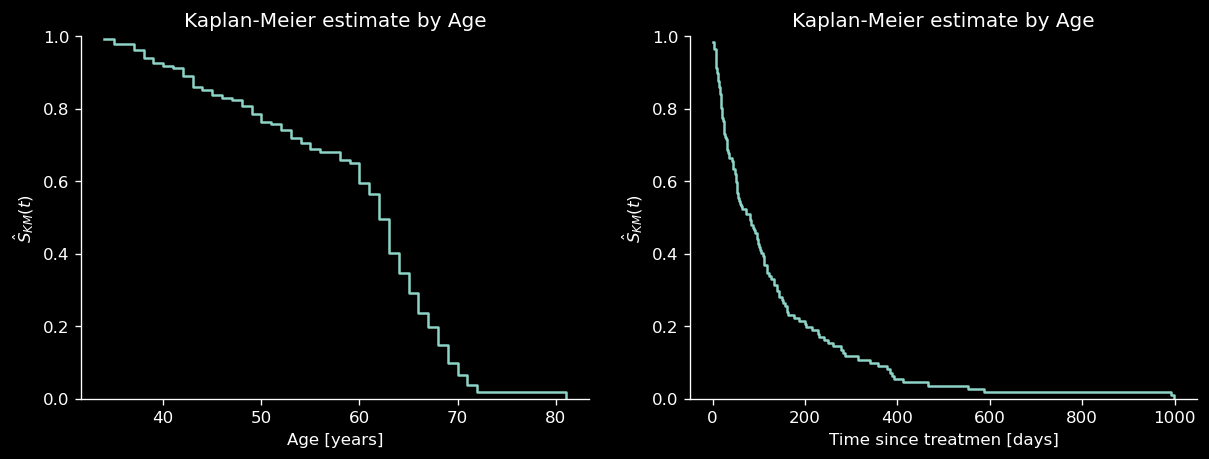

In [ ]:
# Event variable
E = df['status']
x_age, y_age = kaplan_meier_estimator(E.astype(bool), df['age'])
x_time, y_time = kaplan_meier_estimator(E.astype(bool), df['time'])
f, ax = plt.subplots(1, 2, dpi = 120, figsize = (12, 4))
# By age
ax[0].step(x_age, y_age, where="post")
ax[0].set_ylim(0, 1)
clean_ax(ax[0])
ax[0].set_ylabel(r'$\hat{S}_{KM}(t)$')
ax[0].set_xlabel('Age [years]')
ax[0].set_title('Kaplan-Meier estimate by Age')
# By survival time in days since the treatment
ax[1].step(x_time, y_time, where="post")
ax[1].set_ylim(0, 1)
clean_ax(ax[1])
ax[1].set_ylabel(r'$\hat{S}_{KM}(t)$')
ax[1].set_xlabel('Time since treatmen [days]')
ax[1].set_title('Kaplan-Meier estimate by Age')
plt.show()

Patients in this study were given two treatments, this information is stored in the `trt` column of the dataset. We can use this flag to investigate the impact of the two different treatments on the above Survival curves:

In [ ]:
df['trt'].value_counts()

1    69
2    68
Name: trt, dtype: int64

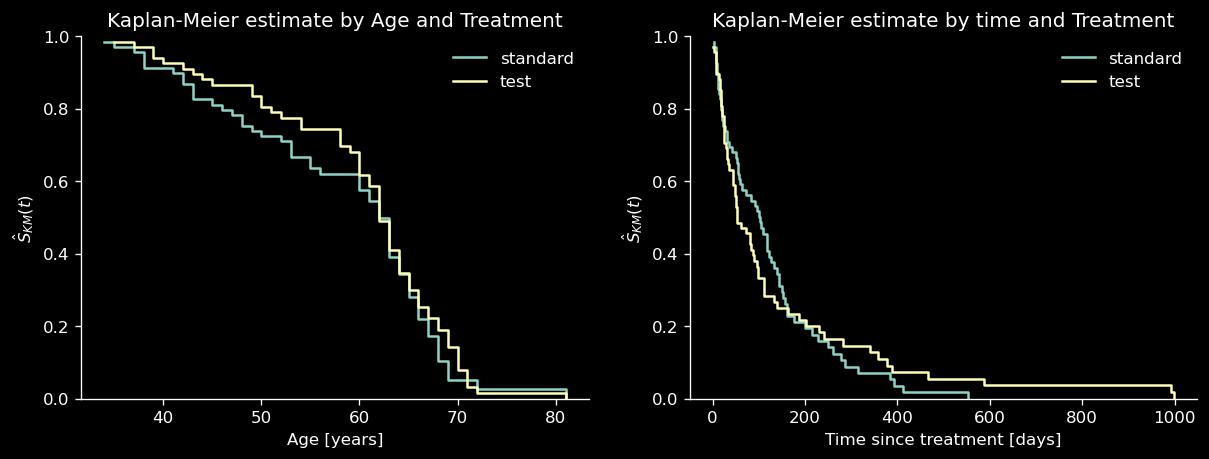

In [ ]:

x_standard, y_standard = kaplan_meier_estimator(df.query('trt == 1')['status'].astype(bool), df.query('trt == 1')['age'])
x_test, y_test = kaplan_meier_estimator(df.query('trt == 2')['status'].astype(bool), df.query('trt == 2')['age'])

f, ax = plt.subplots(1, 2, dpi = 120, figsize = (12, 4))
# Standard treatment by age
ax[0].step(x_standard, y_standard, where="post", label = 'standard')
ax[0].step(x_test, y_test, where="post", label = 'test')
ax[0].set_ylim(0, 1)
clean_ax(ax[0])
ax[0].set_ylabel(r'$\hat{S}_{KM}(t)$')
ax[0].set_xlabel('Age [years]')
ax[0].set_title('Kaplan-Meier estimate by Age and Treatment')
ax[0].legend(loc = 'best', frameon = False)


x_standard, y_standard = kaplan_meier_estimator(df.query('trt == 1')['status'].astype(bool), df.query('trt == 1')['time'])
x_test, y_test = kaplan_meier_estimator(df.query('trt == 2')['status'].astype(bool), df.query('trt == 2')['time'])

# Standard treatment by age
ax[1].step(x_standard, y_standard, where="post", label = 'standard')
ax[1].step(x_test, y_test, where="post", label = 'test')
ax[1].set_ylim(0, 1)
clean_ax(ax[1])
ax[1].set_ylabel(r'$\hat{S}_{KM}(t)$')
ax[1].set_xlabel('Time since treatment [days]')
ax[1].set_title('Kaplan-Meier estimate by time and Treatment')
ax[1].legend(loc = 'best', frameon = False)
plt.show()

The above Kaplan-Meier estimates for the survival curves allow to study the effect of covariates on the survival function. This approach of splitting the dataset into smaller groups according to a variable is useful but not feasible when we want to consider more than a couple of variables, because subgroups will become very small very quickly. For this kind of situations we need models! BAM!

## Cox Proportional Hazard Models

This family of models introduced by Cox (1972) focuses on the hazard function insted of focusing on the survival function. The simplest member of this family of models is the **proportional hazards** model. For this model, the hazard at time $t$ for an individual with covariates $\vec{x}_i$ is assumed to be:
$$\lambda(t| \vec{x}_i) = \lambda_0(t)\exp \left\{ \vec{x}_i \cdot \vec{\beta}\right\},$$
where $\lambda_0 (t)$ is a baseline hazard function that describes the risk of individuals with $\vec{x}_i= 0$, who serve as a reference. The multiplicative term $\exp \{\vec{x}_i\cdot \vec{\beta}\}$ is the relative risk, a proportionate increase or reduction in risk that depends on the set of covariates $\vec{x}_i$. Note that this increase or reduction of risk does not change with time. In fact, the **proportional hazard assumption** is satisfied by two samples $\vec{x}_1$ and $\vec{x}_2$ when:
$$\dfrac{\lambda(t|\vec{x}_1)}{\lambda(t|\vec{x}_2)} = \dfrac{\lambda_0(t)\exp\{\vec{x}_1\cdot \vec{\beta}\}}{\lambda_0(t)\exp\{\vec{x}_2\cdot \vec{\beta}\}} = e^{(\vec{x}_1-\vec{x}_2)\cdot \vec{\beta}},$$
is constant with time. Taking the logarithm we obtain:
$$\log\lambda_i(t| \vec{x}_i) = \alpha_0(t)+ \vec{x}_i\cdot \vec{\beta},$$
which yields a linear model for the logarithm of the hazard. Returning to the expression for the hazard, we can integrate it to obtain the cumulative hazard functions:
$$\Lambda_i(t| \vec{x}_i) = \Lambda_0(t) \exp\{\vec{x}_i\cdot \vec{\beta}\},$$
exponentiating we obtain the survival functions:
$$S_i(t| \vec{x}_i)= S_0(t)^{\exp \{\vec{x}_i \cdot \vec{\beta}\}}.$$

Thus, the effect of the relative risk factor on the survival function is to raise it to a power. The likelihood of an event to be observed occuring for subket $i$ at time $t_i$ can be written as:
$$\mathcal{L}_i(\beta) = \dfrac{\lambda(t_i| \vec{x}_i)}{\sum_{j:t_j \geq t_i}\lambda (t_i| \vec{x}_j)},$$
that represents the probability of subject $i$ having an event at time $t_i$ among those at risk at time $t_i$. Note that the baseline hazard gets canceled out in the above expression, so we can write for the likelihood
$$\mathcal{L}(\beta) = \prod_{i}\dfrac{e^{\vec{x}_i\cdot \vec{\beta}}}{\sum_{j: t_j \geq t_i}e^{\vec{x}_j\cdot \vec{\beta}}}$$
The above expression has to be corrected for *tied* events, this is, when the number of deaths $d_i$ at time $t_i$ is greater than 1. This yields:
$$\mathcal{L}(\beta) = \prod_{i}\dfrac{e^{\vec{x}_i\cdot \vec{\beta}}}{\left(\sum_{j: t_j \geq t_i}e^{\vec{x}_j\cdot \vec{\beta}}\right)^{d_i}}.$$
> **Example:** Let us go back to the lung cancer dataset and try to estimate the risk scores and survival curve.

In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.model_selection import train_test_split

In [ ]:
from sksurv.datasets import load_veterans_lung_cancer, get_x_y

# data_x, data_y = load_veterans_lung_cancer()

In [ ]:
df['status_bool'] = df['status'].astype(np.bool_)

In [ ]:
features = ['karno', 'diagtime', 'age', 'prior', 'trt', 'celltype']
targets = ['status_bool', 'time']

data_x, data_y = get_x_y(df[features+ targets], attr_labels= targets, pos_label=True)

from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()


estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis()

In [ ]:
x_test = data_x_numeric.sample(5)

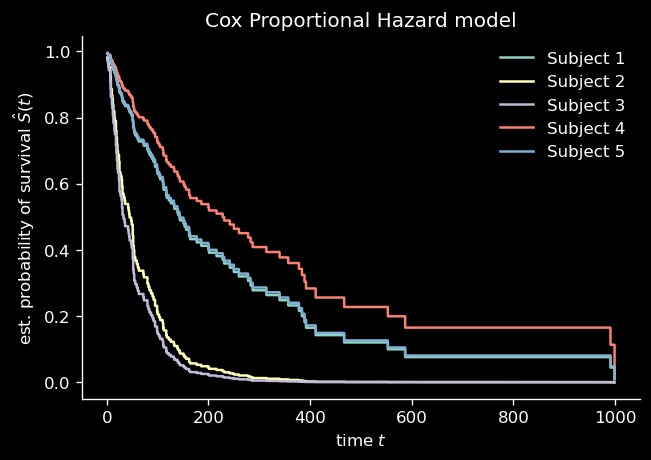

In [ ]:
f, ax = plt.subplots(dpi = 120)
pred_surv = estimator.predict_survival_function(x_test)
time_points = np.arange(1, 1000)
for i, surv_func in enumerate(pred_surv):
    ax.step(time_points, surv_func(time_points), where="post",
             label="Subject %d" % (i + 1))
ax.set_ylabel("est. probability of survival $\hat{S}(t)$")
ax.set_xlabel("time $t$")
ax.legend(loc="best", frameon = False)
clean_ax(ax)
ax.set_title('Cox Proportional Hazard model')
plt.show()

## Exponential and Weibull models
Different kinds of proportional hazard models are obtained depending on the different choices for the baseline survival function. For example, we could (for some reason) set the baseline hazard function $\lambda_0(t) = \lambda_0$ to be a constant value. Then the hazard of subject $i$ at time $t$ reads:
$$\lambda_i(t| \vec{x}_i) = \lambda_0\, e^{\vec{x}_i\cdot \vec{\beta}}.$$

Another common model is obtained by assuming the death density function follows a *Weibull* distribution from which the survival function is:
$$S(t) = e^{-(\lambda t)^p},$$
and hazard function
$$\lambda(t) = p \lambda (\lambda t)^{p-1},$$
where $\lambda >0$ and $p > 0 $ are parameters. If $p=1$, this model reduces to the exponential model and has constant risk over time. If $p>1$, then the risk increases over time. If $p<1$, then the risk decreases with time. this can be seen by taking the log of the above expression:
$$\log \lambda(t) = \log(p) + \log(\lambda) + (p-1)\log(\lambda t).$$



### Time-Varying Covariates
The nature of the model allows for considering time dependent covariates.
Let $\vec{x}_i(t)$ denote the value of a covariate vector for subject $i$ at time (or duration) $t$. The proportional hazard model now reads:
$$\lambda(t|\vec{x}_i) = \lambda_0(t)\;e^{\vec{\beta} \cdot \vec{x}_i(t)}.$$

### Time-dependent "Effects"
The model can also be generalized so the coefficients $\beta(t)$ are now a function of time. Example: it is possible that cetain social characteristics might have a large impact on the hazard for children shortly after birth, but may have a relatively small impact later in life. So, we would like something like:
$$\lambda_i(t|\vec{x}_i) = \lambda_0(t)\; e^{\vec{\beta}(t) \cdot \vec{x}_i}.$$

### The General Hazard Rate Model
Naturally, we can let everything depend on time to obtain the most general version of a hazard rate model:
$$\lambda_i(t|\vec{x}_i) = \lambda_0(t)\;e^{\vec{\beta} (t) \cdot \vec{x}_i(t)}.$$
Or... more generally:
$$\lambda_i(t|\vec{x}_i) = \lambda_0(t)\; f_{ML}(\vec{x}_i,t).$$


# Discrete Time Models
There are cases where the time variable is actually a "discrete" value, which basically means that is not continuous. One example is using the age as a predictor for death risk. Having a discrete description is useful. In practice, it is the discrete description that is used to approximate the functions using our computers.

Let the survival time $T$ be a discrete random variable that takes the values $t_1 < t_2 < \dots < t_n$ with density function:
$f(t_j) = f_j = \mathbb{P}(T = t_i).$
The survivor function at time $t_j$ is then:
$$S(t_j) = S_j = \mathbb{P}(T \geq t_j) = \sum_{k = j}^{\infty}f_k.$$
Next, we need to define the hazard at time $t_j$ as the conditional probability of dying at that time given that one has survived to that point, so that:
$$\lambda(t_j) = \lambda_j = \mathbb{P}(T = t_j | T \geq t_j)=  \dfrac{f_j}{S_j}.$$
Another result of interest in discrete time is that the survival function at time $t_j$ can be written in terms of the hazard at all prior times $t_1, \dots, t_{j-1}$ as:
$$S_j = (1-\lambda_1)(1- \lambda_2) \dots (1-\lambda_{j-1}),$$
which makes sense, since one needs to survive $t_1$, then one must survive $t_2$ given that has survived $t_1$, and so on, finally surviving $t_{j-1}$ up to that point.

# Measuring the Performance of Survival Models
Usual metrics such as RMSE or correlation might not be suitable for censored variables. The most frequently used evalution metric of survival models is the concordance index (c-index, c-statistic). It is a rank correlation between predicted risk scores $\hat{f}$ and observed time points $t$ that is closely related to Kendall's $\tau$. It is defined as the ratio of correctly ordered (concordant) pairs to comparable pairs. This is, two samples $i$ and $j$ are **comparable** if the sample with lower survival time $t$ experienced an event, i.e., if $t_j > t_i$ and $d_i=1$. A comparable pair is **concordant** if the estimated risk $\hat{f}$ by a survival model is higher for subjects with lower survival time, i.e.,
$$\hat{f}_i > \hat{f}_j \; \land t_j > t_i, $$
otherwise the pair is said to be **discordant**. Essentially, we are talking about the following quantity:
$$\boxed{\mathbb{P}(\hat{f}_i > \hat{f}_j| t_j > t_i) .}$$
[Harrell](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3079915/) proposed an estimator of this quantity and that is implemented in `scikit-survival`. Known as Harrell's concordance index, c-index or c-statistic. The interpretation is identicall to our usual ROC curve.

In [ ]:
from sksurv.metrics import concordance_index_censored, concordance_index_ipcw

In [ ]:
prediction = estimator.predict(data_x_numeric)
result = concordance_index_censored(data_y["status_bool"], data_y["time"], prediction)
result[0]

0.7051340299863699

While Harrell’s concordance index is easy to interpret and compute, it has some shortcomings:
1. it has been shown that it is too optimistic with increasing amount of censoring
2. it is not a useful measure of performance if a specific time range is of primary interest (e.g. predicting death within 2 years).

The first point is addressed by a weighing procedure known as IPCW (Inverse Probability of Censoring Weights).

The second issue is adressed by extending the well known ROC curve to possibly censored survival times. Given a time point $t$, we can estimate how well a predictive model can distinguishing subjects who will experience an event by time $t$ (sensitivity) from those who will not (specificity). The resulting AUC for this time-dependent cumulative/dynamic ROC curve is:
 $$\text{AUC}^{C,D}(t) = \mathbb{P}(\hat{f}_i > \hat{f}_j | T_i \leq t, T_j > t).$$
 An estimator for this quantity is implemented in `scikit-survival`, defined as:
 $$\widehat{AUC}(t) = \dfrac{\sum_{i=1}^{N}\sum_{j=1}^{N}\mathbb{I}_{t_j>t}\,\mathbb{I}_{t_i\leq t}\,\omega_i\, \mathbb{I}_{\hat{f}_i > \hat{f}_j}}{\left(\sum_{i = 1}^{N}\mathbb{I}_{t_i> t}\right)\left(\sum_{i = 1}^{N}\mathbb{I}_{t_j\leq t}\omega_i\right)},$$
where $\omega_i$ are inverse probability of censoring weights (IPCW).
To estimate IPCW, access to survival times from the training data is required to estimate the censoring distribution. Note that this requires that survival times survival_test lie within the range of survival times survival_train. This can be achieved by specifying times accordingly, e.g. by setting times[-1] slightly below the maximum expected follow-up time. IPCW are computed using the Kaplan-Meier estimator, which is restricted to situations where the random censoring assumption holds and censoring is independent of the features.
Finally, the function also provides a single summary measure that refers to the mean of the $\text{AUC}(t)$ over the time range $(\tau_1,\tau_2)$:
$$\widehat{\text{AUC}}(\tau_1, \tau_2) = \dfrac{1}{\hat{S}(\tau_1)- \hat{S}(\tau_2)}\int_{\tau_1}^{\tau_2}\widehat{\text{AUC}}(t)d\hat{S}(t),$$
where $\hat{S}(t)$ is the Kaplan-Meier estimator of the survival function.




In [ ]:
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sksurv.datasets import load_flchain

from sklearn.impute import SimpleImputer

Let us load another built-in dataset from `scikit-survival`. The dataset has 7874 samples and 9 features:

>* age: age in years
>* sex: F=female, M=male
>* sample.yr: the calendar year in which a blood sample was obtained
>* kappa: serum free light chain, kappa portion
>* lambda: serum free light chain, lambda portion
>* flc.grp: the serum free light chain group for the subject, as used in the original analysis
>* creatinine: serum creatinine
>* mgus: whether the subject had been diagnosed with monoclonal gammapothy (MGUS)
>* chapter: for those who died, a grouping of their primary cause of death by chapter headings of the International Code of Diseases ICD-9
>* The endpoint is death, which occurred for 2169 subjects (27.5%).

In [ ]:
x, y = load_flchain()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Let us treat some missing values

In [ ]:
num_columns = ['age', 'creatinine', 'kappa', 'lambda']

imputer = SimpleImputer().fit(x_train.loc[:, num_columns])
x_test_imputed = imputer.transform(x_test.loc[:, num_columns])

We need to be a little bit careful when selecting the test data and time points we want to evaluate the ROC at, due to the estimator’s dependence on inverse probability of censoring weighting. First, we are going to check whether the observed time of the test data lies within the observed time range of the training data.

In [ ]:
y_events = y_train[y_train['death']]
train_min, train_max = y_events["futime"].min(), y_events["futime"].max()

y_events = y_test[y_test['death']]
test_min, test_max = y_events["futime"].min(), y_events["futime"].max()

assert train_min <= test_min < test_max < train_max, \
    "time range or test data is not within time range of training data."

When choosing the time points to evaluate the ROC at, it is important to remember to choose the last time point such that the probability of being censored after the last time point is non-zero. Here we use a more conservative approach by setting the upper bound to the 80% percentile of observed time points, because the censoring rate is quite large at 72.5%.

In [ ]:
times = np.percentile(y["futime"], np.linspace(5, 81, 15))
print(times)

[ 470.3        1259.         1998.         2464.82428571 2979.
 3401.         3787.99857143 4051.         4249.         4410.17285714
 4543.         4631.         4695.         4781.         4844.        ]


Text(0.5, 1.0, 'Time dependent AUC')

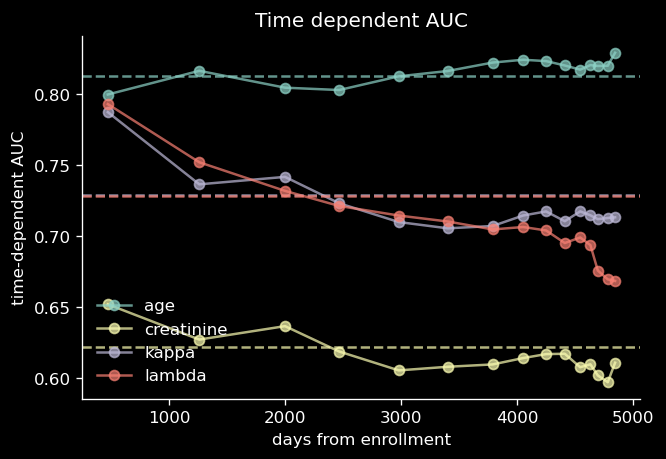

In [ ]:
def plot_cumulative_dynamic_auc(risk_score, label, color=None, ax = None):
    auc, mean_auc = cumulative_dynamic_auc(y_train, y_test, risk_score, times)
    if ax == None:
        plt.plot(times, auc, marker="o", color=color, label=label, alpha = 0.7)
        plt.xlabel("days from enrollment")
        plt.ylabel("time-dependent AUC")
        plt.axhline(mean_auc, color=color, linestyle="--", alpha = 0.7)
        plt.legend(loc = 'best', frameon = False)
    else:
        ax.plot(times, auc, marker="o", color=color, label=label, alpha = 0.7)
        ax.set_xlabel("days from enrollment")
        ax.set_ylabel("time-dependent AUC")
        ax.axhline(mean_auc, color=color, linestyle="--", alpha = 0.7)
        ax.legend(loc = 'best', frameon = False)



f, ax = plt.subplots(dpi = 120)

for i, col in enumerate(num_columns):
    plot_cumulative_dynamic_auc(x_test_imputed[:, i], col, color="C{}".format(i), ax = ax)
    ret = concordance_index_ipcw(y_train, y_test, x_test_imputed[:, i], tau=times[-1])
    clean_ax(ax)
ax.set_title('Time dependent AUC')

The plot shows the estimated area under the time-dependent ROC at each time point and the average across all time points as dashed line.

We can see that age is overall the most discriminative feature, followed by $\kappa$ and $\lambda$ FLC. That fact that age is the strongest predictor of overall survival in the general population is hardly surprising (we have to die at some point after all). More differences become evident when considering time: the discriminative power of FLC decreases at later time points, while that of age increases. The observation for age again follows common sense. In contrast, FLC seems to be a good predictor of death in the near future, but not so much if it occurs decades later.

## Evaluating model's predictions
### Cox Proportional Hazards model



In [ ]:
from sklearn.pipeline import make_pipeline

va_x, va_y = load_veterans_lung_cancer()

va_x_train, va_x_test, va_y_train, va_y_test = train_test_split(
                                                    va_x, va_y, test_size=0.2, stratify=va_y["Status"], random_state=0
                                                )

Fit the Cox prorportional hazard model to the train data:

In [ ]:
cph = make_pipeline(OneHotEncoder(), CoxPHSurvivalAnalysis())
cph.fit(va_x_train, va_y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('coxphsurvivalanalysis', CoxPHSurvivalAnalysis())])

Using the test data, we want to assess how well the model can distinguish survivors from deceased in weekly intervals, up to 6 months after enrollment.

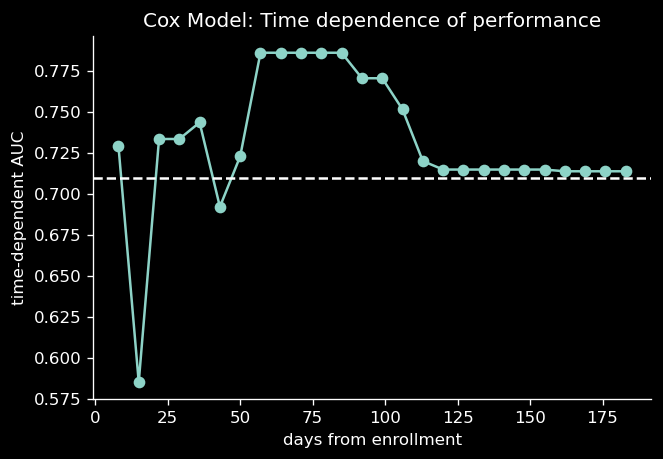

In [ ]:
va_times = np.arange(8, 184, 7)
cph_risk_scores = cph.predict(va_x_test)
cph_auc, cph_mean_auc = cumulative_dynamic_auc(va_y_train, va_y_test, cph_risk_scores, va_times)

f, ax = plt.subplots(dpi = 120)
ax.plot(va_times, cph_auc, marker="o")
ax.axhline(cph_mean_auc, linestyle="--")
ax.set_xlabel("days from enrollment")
ax.set_ylabel("time-dependent AUC")
ax.grid(False)
ax.set_title('Cox Model: Time dependence of performance')
clean_ax(ax)
plt.show()

The plot shows that the model is doing moderately well on average with an AUC of $\approx 0.72$ (dashed line). However, there is a clear difference in performance between the first and second half of the time range. The performance on the test data increases up to 56 days from enrollment, remains high until 98 days and quickly drops thereafter. Thus, we can conclude that the model is most effective in predicting death in the **medium-term**.

### Random Survival Forests
The downside of Cox proportional hazards model is that it can only predict a risk score that is independent of time (due to the built-in proportional hazards assumption). Therefore, a single predicted risk score needs to work well for every time point. In contrast, a Random Survival Forest does not have this restriction. So let’s fit such a model to the training data.  Details of the inner workings of Random Survival Forests can be found [here](https://arxiv.org/pdf/0811.1645.pdf).

In [ ]:
from sksurv.ensemble import RandomSurvivalForest

rsf = make_pipeline(OneHotEncoder(),
                    RandomSurvivalForest(n_estimators=100, min_samples_leaf=7, random_state=0)
                    )
rsf.fit(va_x_train, va_y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('randomsurvivalforest',
                 RandomSurvivalForest(min_samples_leaf=7, random_state=0))])

For prediction, we do not call predict, which returns a time-independent risk score, but call predict_cumulative_hazard_function, which returns a risk function over time for each patient. We obtain the time-dependent risk scores by evaluating each cumulative hazard function at the time points we are interested in.

In [ ]:
# Predict
rsf_chf_funcs = rsf.predict_cumulative_hazard_function(va_x_test, return_array=False)
rsf_risk_scores = np.row_stack([chf(va_times) for chf in rsf_chf_funcs])

# Dynamic AUC
rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(va_y_train, va_y_test, rsf_risk_scores, va_times)

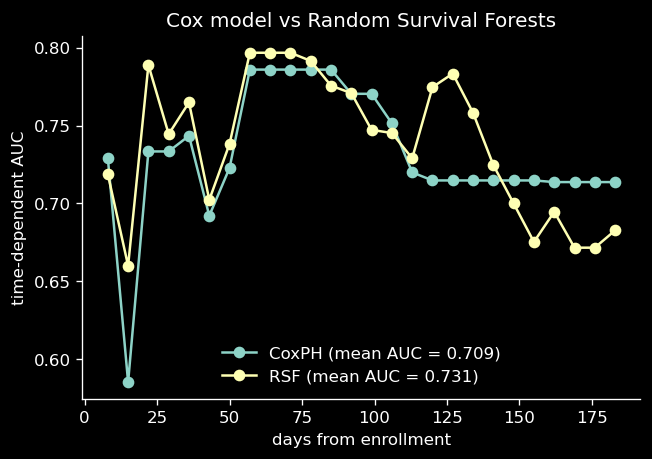

In [ ]:
f, ax = plt.subplots(dpi = 120)

ax.plot(va_times, cph_auc, "o-", label="CoxPH (mean AUC = {:.3f})".format(cph_mean_auc))
ax.plot(va_times, rsf_auc, "o-", label="RSF (mean AUC = {:.3f})".format(rsf_mean_auc))
ax.set_xlabel("days from enrollment")
ax.set_ylabel("time-dependent AUC")
ax.legend(loc="lower center", frameon = False)
clean_ax(ax)
ax.set_title('Cox model vs Random Survival Forests')
plt.show()

Indeed, the Random Survival Forest performs slightly better on average, mostly due to the better performance in the intervals 25–50 days, and 112–147 days. Above 147 days, it actually is doing worse. This shows that the mean AUC is convenient to assess overall performance, but it can hide interesting characteristics that only become visible when looking at the AUC at individual time points.

## Conclusions and further references

IMHO Survival Analysis is about asking the right questions:
* Does it make sense to tackle this or that problem as a usual classification problem?
* What are we trying to model?
* Is time an important variable for prediction?

There is a considerable amount of (open source) resources out there that are written in python such as [pySurvival](https://square.github.io/pysurvival/index.html) and [scikit-survival](https://scikit-survival.readthedocs.io/en/stable/index.html). The people at Loft made a clever use of XGBoost and some other techniques to tackle the survival analysis problem know as [XGBoost-survival-embeddings](https://github.com/loft-br/xgboost-survival-embeddings).
